In [1]:
pwd

'/Users/ud4/repos/GitHub/FATESFACE/Jupyter_Notebooks'

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

## Logs of File
Reading the logs of the print file for the data in the file `components/elm/src/external_models/fates/biogeochem/EDPhysiologyMod.F90`

### Printing the following lines of the Phenology routine `phenology` in the file `EDPhysiologyMod.F90` for cold deciduous only

```
    print*,'sinkhole_phenology', model_day_int,temp_in_C,ncdstart,gddstart, currentSite%nchilldays, gdd_threshold,ncolddays, &
      currentSite%grow_deg_days, currentSite%cleafoffdate, currentSite%cndaysleafoff,currentSite%cleafondate,currentSite%cndaysleafon
    print*,'sinkhole_phenology_def',phen_cstat_iscold,phen_cstat_nevercold,phen_cstat_notcold

    !LEAF ON: COLD DECIDUOUS. Needs to
    !1) have exceeded the growing degree day threshold
    !2) The leaves should not be on already
    !3) There should have been at least one chilling day in the counting period.
    !   this prevents tropical or warm climate plants that are "cold-deciduous"
    !   from ever re-flushing after they have reached their maximum age (thus
    !   preventing them from competing
    print*,'sinkhole_phenology_LOn1', model_day_int,currentSite%cstatus,ED_val_phen_mindayson,currentSite%grow_deg_days,gdd_threshold,currentSite%nchilldays,currentSite%cleafondate

    if ( any(currentSite%cstatus == [phen_cstat_iscold,phen_cstat_nevercold]) .and. &
         (currentSite%grow_deg_days > gdd_threshold) .and. &
         (currentSite%cndaysleafoff > ED_val_phen_mindayson) .and. &
         (currentSite%nchilldays >= 1)) then
       currentSite%cstatus = phen_cstat_notcold  ! Set to not-cold status (leaves can come on)
       currentSite%cleafondate = model_day_int
       currentSite%cndaysleafon = 0
       currentSite%grow_deg_days = 0._r8 ! zero GDD for the rest of the year until counting season begins.
       if ( debug ) write(fates_log(),*) 'leaves on'
    endif !GDD
    print*,'sinkhole_phenology_LOn2', model_day_int,currentSite%cstatus, currentSite%cleafondate,currentSite%grow_deg_days
    
    !LEAF OFF: COLD THRESHOLD
    !Needs to:
    !1) have exceeded the number of cold days threshold
    !2) have exceeded the minimum leafon time.
    !3) The leaves should not be off already
    !4) The day of simulation should be larger than the counting period.

    print*,'sinkhole_phenology_LOff1', model_day_int,currentSite%cstatus,num_vegtemp_mem,ED_val_phen_ncolddayslim,ED_val_phen_mindayson,currentSite%cndaysleafon
    if ( (currentSite%cstatus == phen_cstat_notcold) .and. &
         (model_day_int > num_vegtemp_mem)      .and. &
         (ncolddays > ED_val_phen_ncolddayslim) .and. &
         (currentSite%cndaysleafon > ED_val_phen_mindayson) )then

       currentSite%grow_deg_days  = 0._r8          ! The equations for Botta et al
       ! are for calculations of
       ! first flush, but if we dont
       ! clear this value, it will cause
       ! leaves to flush later in the year
       currentSite%cstatus       = phen_cstat_iscold  ! alter status of site to 'leaves off'
       currentSite%cleafoffdate = model_day_int       ! record leaf off date
       currentSite%cndaysleafoff = 0

       if ( debug ) write(fates_log(),*) 'leaves off'
    endif

    print*,'sinkhole_phenology_LOff2', model_day_int,currentSite%cstatus , currentSite%grow_deg_days,currentSite%cndaysleafoff

    ! LEAF OFF: COLD LIFESPAN THRESHOLD
    ! NOTE: Some areas of the planet will never generate a cold day
    ! and thus %nchilldays will never go from zero to 1.  The following logic
    ! when coupled with this fact will essentially prevent cold-deciduous
    ! plants from re-emerging in areas without at least some cold days

    print*,'sinkhole_phenology_LOff_th', model_day_int,currentSite%cstatus, currentSite%cndaysleafoff,currentSite%cleafoffdate
    if( (currentSite%cstatus == phen_cstat_notcold)  .and. &
        (currentSite%cndaysleafoff > 400)) then   ! remove leaves after a whole year,
                                                  ! when there is no 'off' period.
       currentSite%grow_deg_days  = 0._r8

       currentSite%cstatus = phen_cstat_nevercold  ! alter status of site to imply that this
       ! site is never really cold enough
       ! for cold deciduous
       currentSite%cleafoffdate = model_day_int    ! record leaf off date
       currentSite%cndaysleafoff = 0

       if ( debug ) write(fates_log(),*) 'leaves off'
    endif
    print*,'sinkhole_phenology_LOff_th2', model_day_int,currentSite%cstatus,currentSite%grow_deg_days ,currentSite%cndaysleafoff
    
```

In [6]:
path_in_logs = "/Users/ud4/repos/GitHub/FATESFACE/Print_Logs"
file_name = "Phenology_log_r240313.txt"


In [9]:
with open(f'{path_in_logs}/{file_name}', 'r') as infile:
    data = infile.read()

In [117]:
# How long do you want the simulation plots?
max_r_years = 30
max_line_idx = max_r_years*365*8 # 30 years * 364 days * 8 freq output per day

In [33]:
# Split data into lines
lines = data.split('\n')

# Initialize a dictionary of dataframes
dfs = {}

# Iterate over lines and create dataframes based on the first item i.e. print header
for line_idx, line in enumerate(lines):
    parts = line.split()
    key = parts[0]
    if key not in dfs:
        dfs[key] = []
    dfs[key].append(parts)
    if line_idx>max_line_idx:
        break
        



In [34]:
max_line_idx

87600

In [77]:
column_names = {}
column_names ['sinkhole_phenology'] = ['Name', 'Model_Day', 'temp_in_C', 'ncdstart','gddstart', 'nchilldays', 'gdd_threshold','ncolddays', 'grow_deg_days', 'cleafoffdate', 'cndaysleafoff','cleafondate','cndaysleafon']
column_names ['sinkhole_phenology_def'] = ['Name', 'phen_cstat_iscold', 'phen_cstat_nevercold', 'phen_cstat_notcold']
column_names ['sinkhole_phenology_LOn1'] = ['Name', 'Model_Day', 'cstatus', 'ED_val_phen_mindayson','grow_deg_days','gdd_threshold','nchilldays','cleafondate']
column_names ['sinkhole_phenology_LOn2'] = ['Name', 'Model_Day', 'cstatus', 'cleafondate','grow_deg_days']
column_names ['sinkhole_phenology_LOff1'] = ['Name', 'Model_Day', 'cstatus', 'num_vegtemp_mem','ED_val_phen_ncolddayslim','ED_val_phen_mindayson','cndaysleafon']
column_names ['sinkhole_phenology_LOff2'] = ['Name', 'Model_Day', 'cstatus', 'grow_deg_days','cndaysleafoff']
column_names ['sinkhole_phenology_LOff_th'] = ['Name', 'Model_Day', 'cstatus', 'cndaysleafoff','cleafoffdate']
column_names ['sinkhole_phenology_LOff_th2'] = ['Name', 'Model_Day', 'cstatus', 'grow_deg_days','cndaysleafoff']


In [78]:
dict_of_dataframes = {}
# Create dataframes from lists of lists
for key, values in dfs.items():
    df = pd.DataFrame(values,columns=column_names[key])
    print(f"Dataframe for {key}:")
    print(df)
    print()
    dict_of_dataframes[key] = df

Dataframe for sinkhole_phenology:
                     Name Model_Day             temp_in_C ncdstart gddstart  \
0      sinkhole_phenology         1    15.000000000000057      270        1   
1      sinkhole_phenology         2  -0.12143019246548192      270        1   
2      sinkhole_phenology         3    1.8371444335781462      270        1   
3      sinkhole_phenology         4    12.345837344257973      270        1   
4      sinkhole_phenology         5    16.943634897538857      270        1   
...                   ...       ...                   ...      ...      ...   
10946  sinkhole_phenology     10947   -7.5270423032126246      270        1   
10947  sinkhole_phenology     10948   -5.4280514176119254      270        1   
10948  sinkhole_phenology     10949   -7.5973448274695556      270        1   
10949  sinkhole_phenology     10950   -7.8760887490191180      270        1   
10950  sinkhole_phenology     10951   -8.2052535979563572      270        1   

      nchilldays 

In [79]:
# Making the columns as floats except of the 1st 
for key in dict_of_dataframes.keys():
    for k in dict_of_dataframes[key].columns[1:]:
        dict_of_dataframes[key][k] = dict_of_dataframes[key][k].astype(float)

In [80]:
dict_of_dataframes['sinkhole_phenology'].head()


Name  Model_Day  temp_in_C  ncdstart  gddstart  nchilldays  \
0  sinkhole_phenology        1.0  15.000000     270.0       1.0         0.0   
1  sinkhole_phenology        2.0  -0.121430     270.0       1.0         1.0   
2  sinkhole_phenology        3.0   1.837144     270.0       1.0         2.0   
3  sinkhole_phenology        4.0  12.345837     270.0       1.0         2.0   
4  sinkhole_phenology        5.0  16.943635     270.0       1.0         2.0   

   gdd_threshold  ncolddays  grow_deg_days  cleafoffdate  cndaysleafoff  \
0     570.000000        9.0            0.0         299.0           67.0   
1     563.651794        9.0            0.0         299.0           68.0   
2     557.366754        9.0            0.0         299.0           69.0   
3     557.366754        8.0            0.0         299.0           70.0   
4     557.366754        7.0            0.0         299.0           71.0   

   cleafondate  cndaysleafon  
0         99.0         267.0  
1         99.0         268.0  
2         99.0         269.0  
3         99.0         270.0  
4         99.0         271.0

In [81]:
dict_of_dataframes['sinkhole_phenology_def'].head()


Name  phen_cstat_iscold  phen_cstat_nevercold  \
0  sinkhole_phenology_def                1.0                   0.0   
1  sinkhole_phenology_def                1.0                   0.0   
2  sinkhole_phenology_def                1.0                   0.0   
3  sinkhole_phenology_def                1.0                   0.0   
4  sinkhole_phenology_def                1.0                   0.0   

   phen_cstat_notcold  
0                 2.0  
1                 2.0  
2                 2.0  
3                 2.0  
4                 2.0

In [82]:
dict_of_dataframes['sinkhole_phenology_LOn1'].head()


Name  Model_Day  cstatus  ED_val_phen_mindayson  \
0  sinkhole_phenology_LOn1        1.0      2.0                   90.0   
1  sinkhole_phenology_LOn1        2.0      2.0                   90.0   
2  sinkhole_phenology_LOn1        3.0      2.0                   90.0   
3  sinkhole_phenology_LOn1        4.0      2.0                   90.0   
4  sinkhole_phenology_LOn1        5.0      2.0                   90.0   

   grow_deg_days  gdd_threshold  nchilldays  cleafondate  
0            0.0     570.000000         0.0         99.0  
1            0.0     563.651794         1.0         99.0  
2            0.0     557.366754         2.0         99.0  
3            0.0     557.366754         2.0         99.0  
4            0.0     557.366754         2.0         99.0

In [83]:
dict_of_dataframes['sinkhole_phenology_LOn2'].head()


Name  Model_Day  cstatus  cleafondate  grow_deg_days
0  sinkhole_phenology_LOn2        1.0      2.0         99.0            0.0
1  sinkhole_phenology_LOn2        2.0      2.0         99.0            0.0
2  sinkhole_phenology_LOn2        3.0      2.0         99.0            0.0
3  sinkhole_phenology_LOn2        4.0      2.0         99.0            0.0
4  sinkhole_phenology_LOn2        5.0      2.0         99.0            0.0

In [84]:
dict_of_dataframes['sinkhole_phenology_LOff1'].head()


Name  Model_Day  cstatus  num_vegtemp_mem  \
0  sinkhole_phenology_LOff1        1.0      2.0             10.0   
1  sinkhole_phenology_LOff1        2.0      2.0             10.0   
2  sinkhole_phenology_LOff1        3.0      2.0             10.0   
3  sinkhole_phenology_LOff1        4.0      2.0             10.0   
4  sinkhole_phenology_LOff1        5.0      2.0             10.0   

   ED_val_phen_ncolddayslim  ED_val_phen_mindayson  cndaysleafon  
0                       5.0                   90.0         267.0  
1                       5.0                   90.0         268.0  
2                       5.0                   90.0         269.0  
3                       5.0                   90.0         270.0  
4                       5.0                   90.0         271.0

In [85]:
dict_of_dataframes['sinkhole_phenology_LOff2'].head()


Name  Model_Day  cstatus  grow_deg_days  cndaysleafoff
0  sinkhole_phenology_LOff2        1.0      2.0            0.0           67.0
1  sinkhole_phenology_LOff2        2.0      2.0            0.0           68.0
2  sinkhole_phenology_LOff2        3.0      2.0            0.0           69.0
3  sinkhole_phenology_LOff2        4.0      2.0            0.0           70.0
4  sinkhole_phenology_LOff2        5.0      2.0            0.0           71.0

In [86]:
dict_of_dataframes['sinkhole_phenology_LOff_th'].head()


Name  Model_Day  cstatus  cndaysleafoff  cleafoffdate
0  sinkhole_phenology_LOff_th        1.0      2.0           67.0         299.0
1  sinkhole_phenology_LOff_th        2.0      2.0           68.0         299.0
2  sinkhole_phenology_LOff_th        3.0      2.0           69.0         299.0
3  sinkhole_phenology_LOff_th        4.0      2.0           70.0         299.0
4  sinkhole_phenology_LOff_th        5.0      2.0           71.0         299.0

In [87]:
dict_of_dataframes['sinkhole_phenology_LOff_th2'].head()


Name  Model_Day  cstatus  grow_deg_days  \
0  sinkhole_phenology_LOff_th2        1.0      2.0            0.0   
1  sinkhole_phenology_LOff_th2        2.0      2.0            0.0   
2  sinkhole_phenology_LOff_th2        3.0      2.0            0.0   
3  sinkhole_phenology_LOff_th2        4.0      2.0            0.0   
4  sinkhole_phenology_LOff_th2        5.0      2.0            0.0   

   cndaysleafoff  
0           67.0  
1           68.0  
2           69.0  
3           70.0  
4           71.0

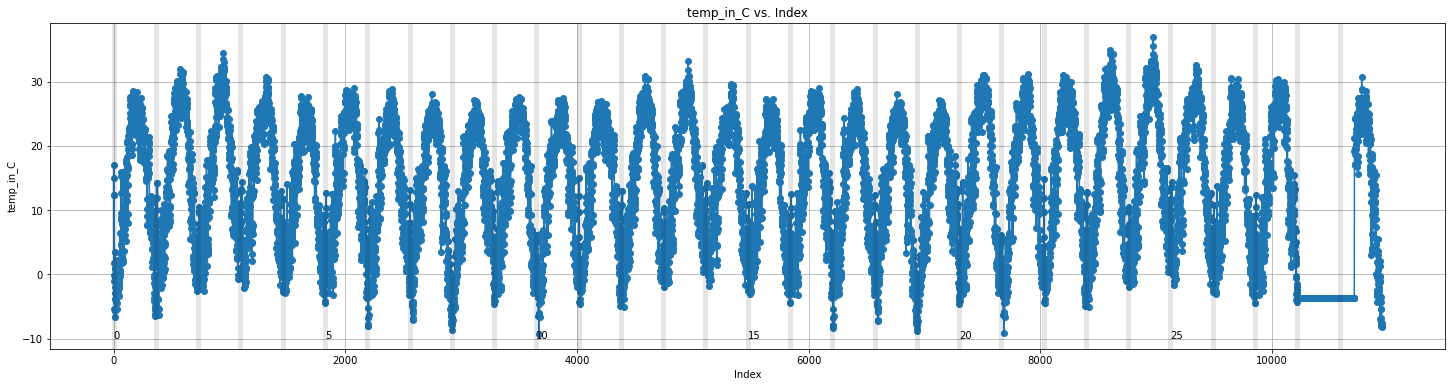

In [120]:
# Plotting
df_key = "sinkhole_phenology"
df_key_col = "temp_in_C"
plt.figure(figsize=(25,6))
plt.plot(dict_of_dataframes[f"{df_key}"].index, dict_of_dataframes[f"{df_key}"][f"{df_key_col}"], marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel(f'{df_key_col}')
plt.title(f'{df_key_col} vs. Index')
plt.grid(True)
for i in range(max_r_years):
    plt.axvline(x = i*365, color = 'k',lw=5, alpha=.1)
    if i%5==0:
        plt.text(i*365,-10, int(i))
plt.show()



/var/folders/f1/01gxw8vn74q_x_rf_p5ztryjr405zq/T/ipykernel_80362/2109787684.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(35,6))


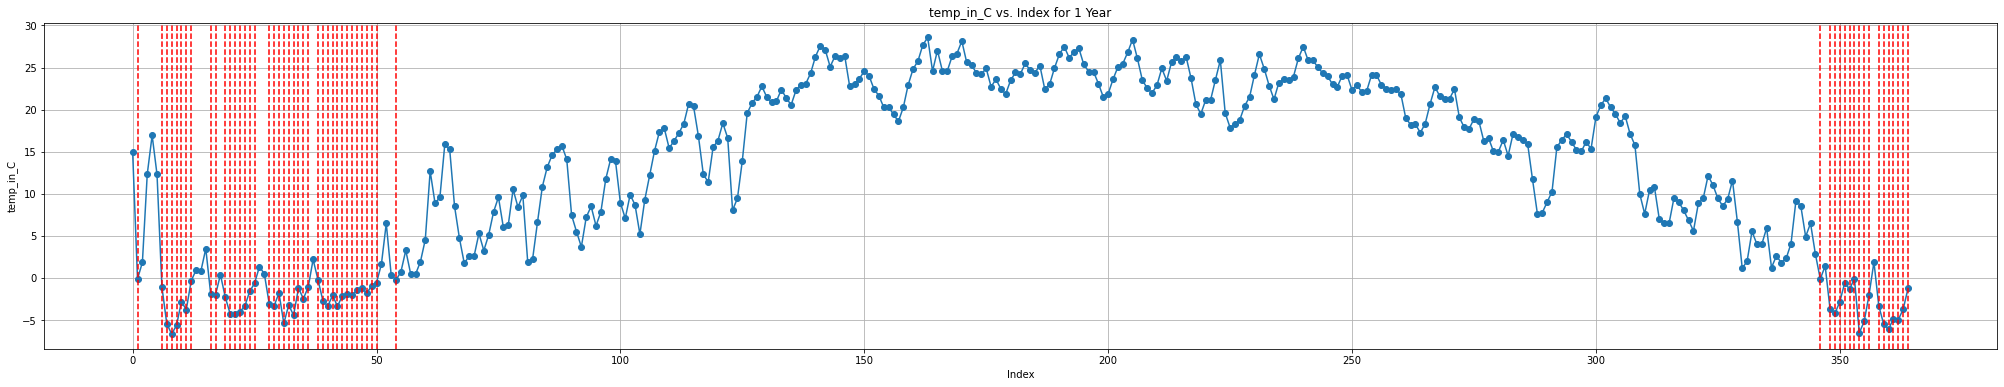

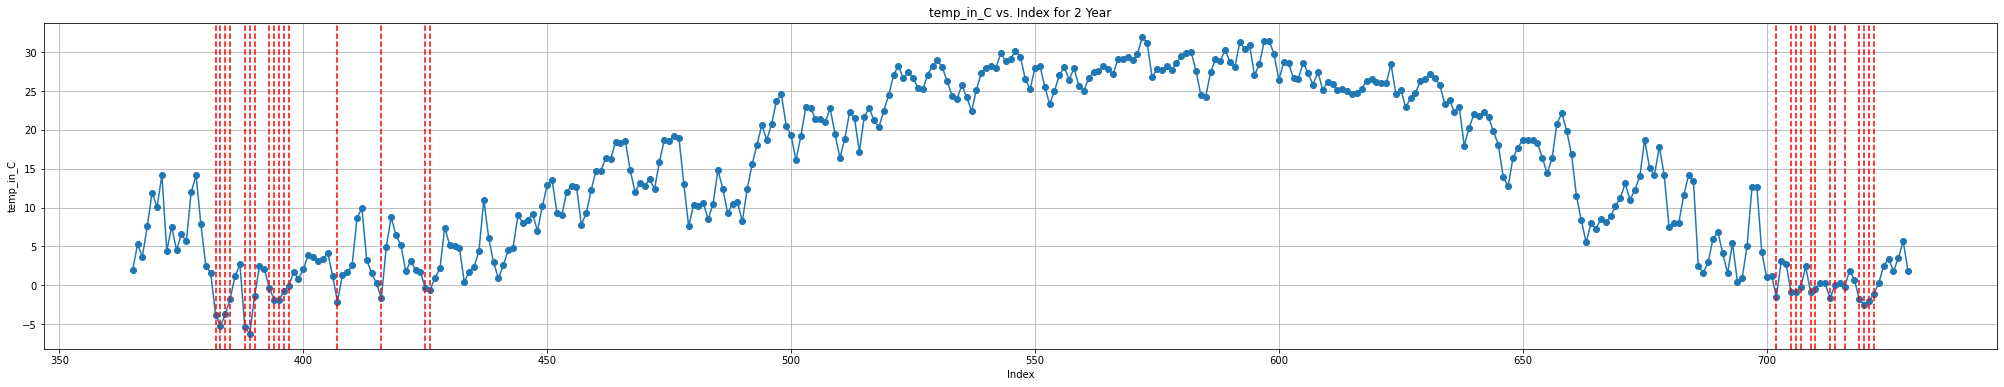

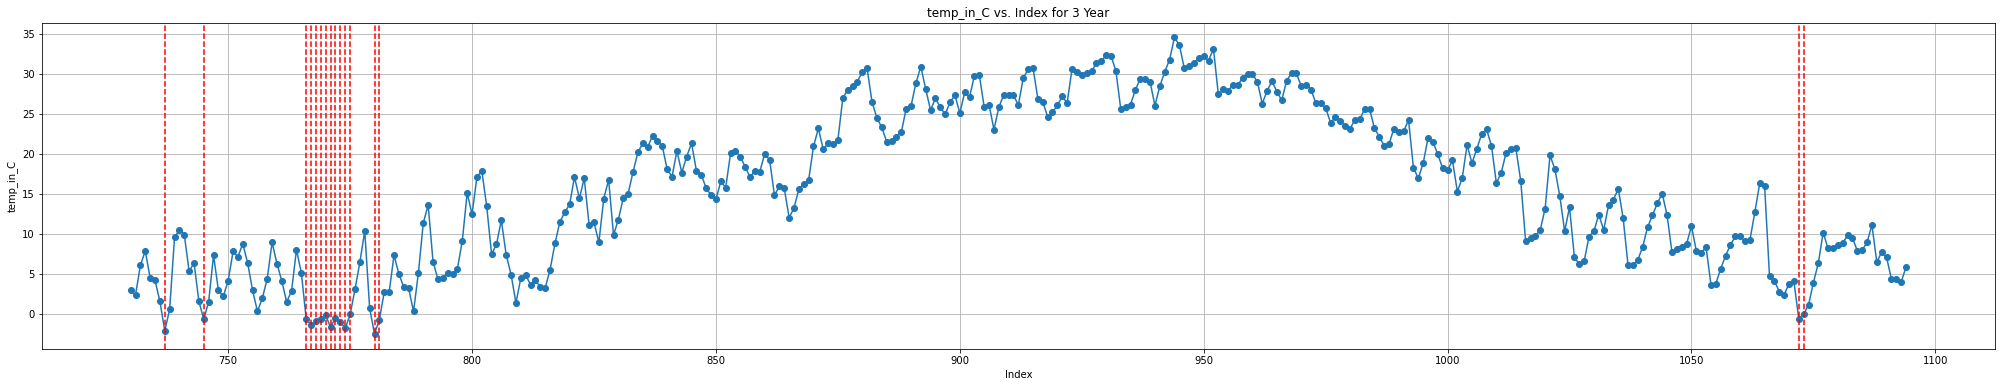

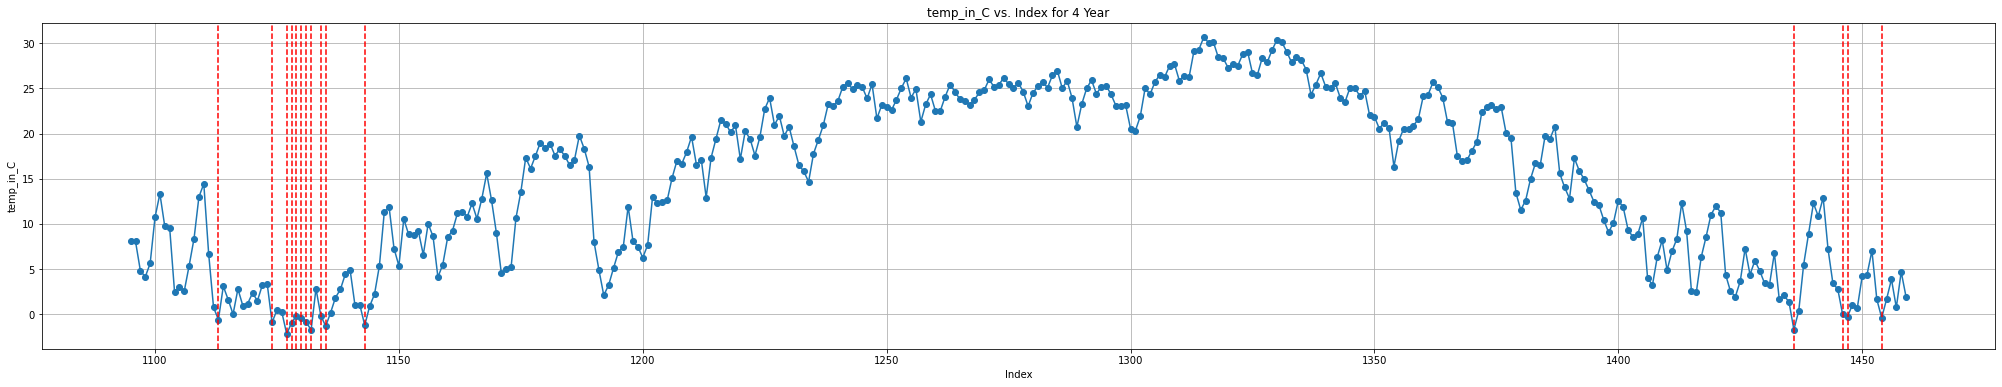

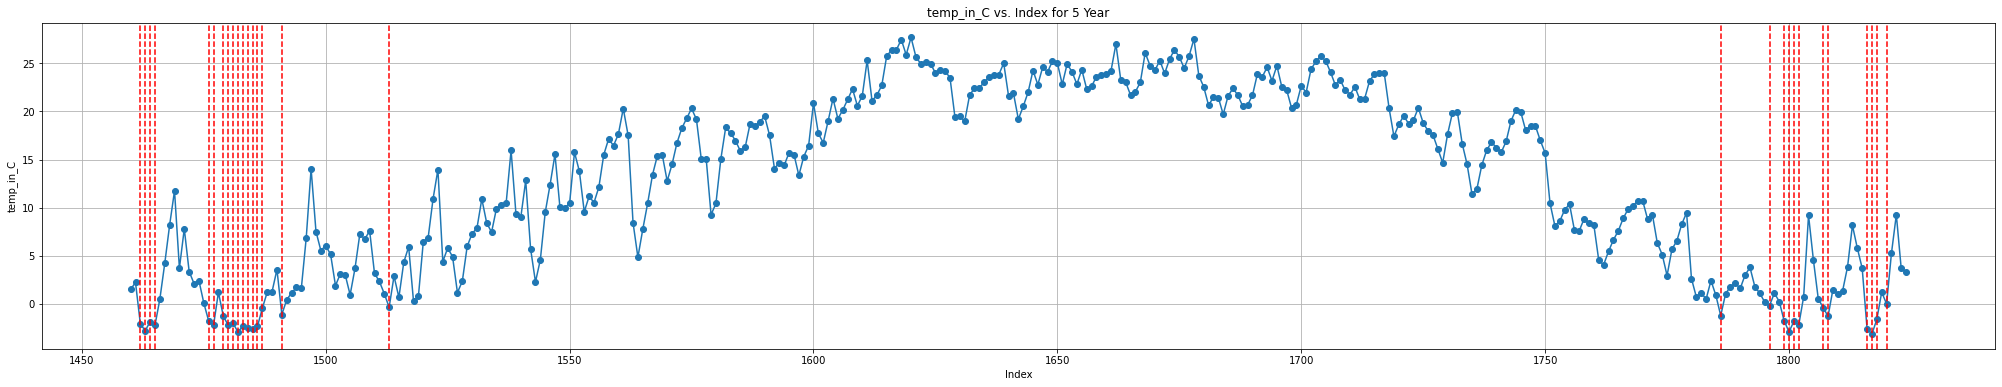

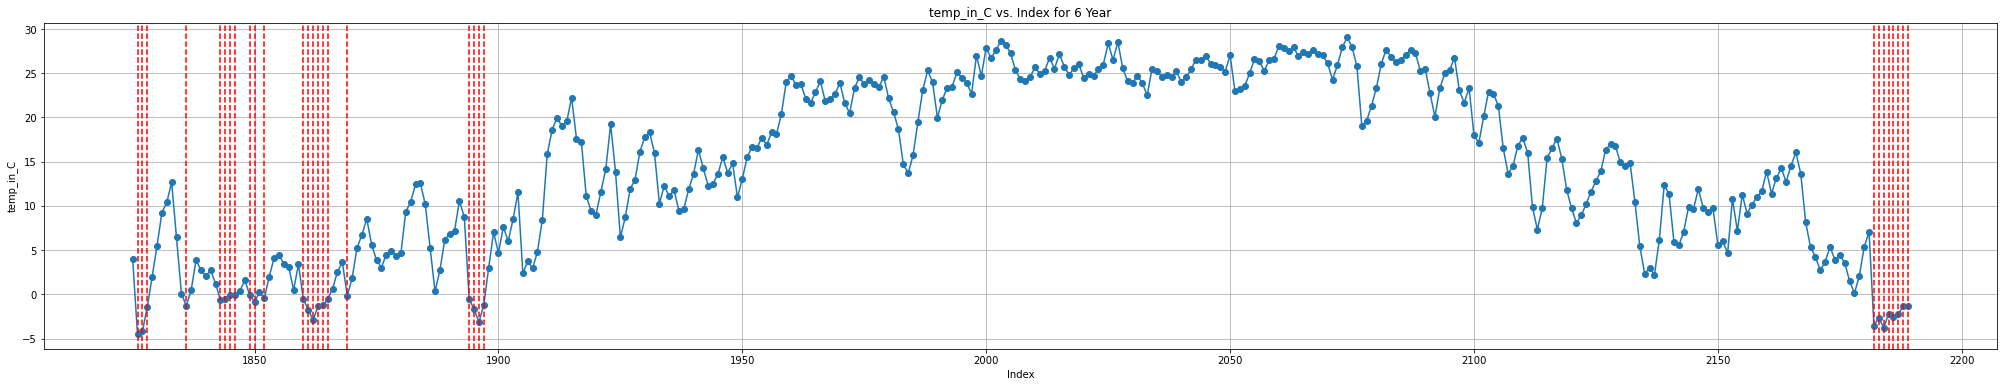

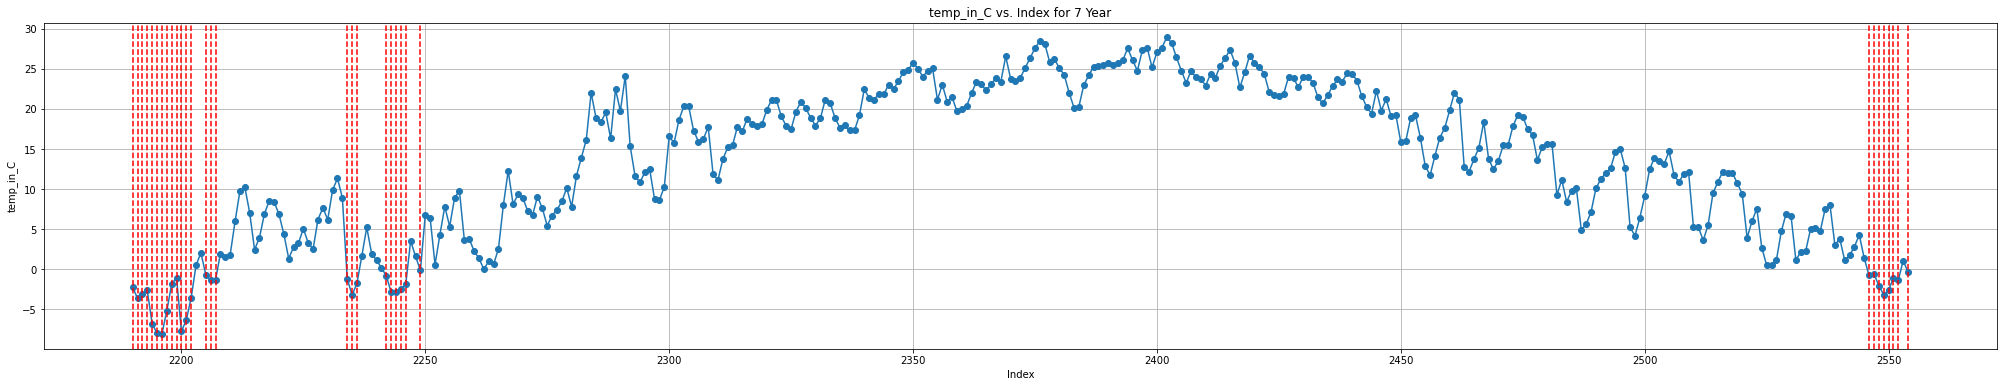

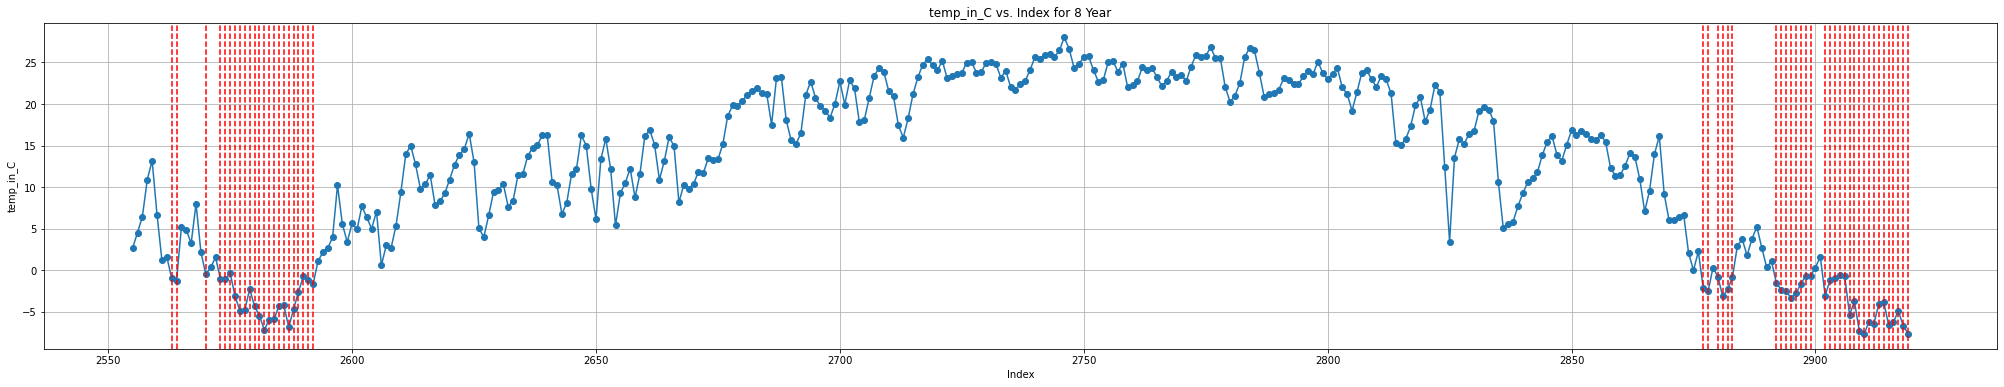

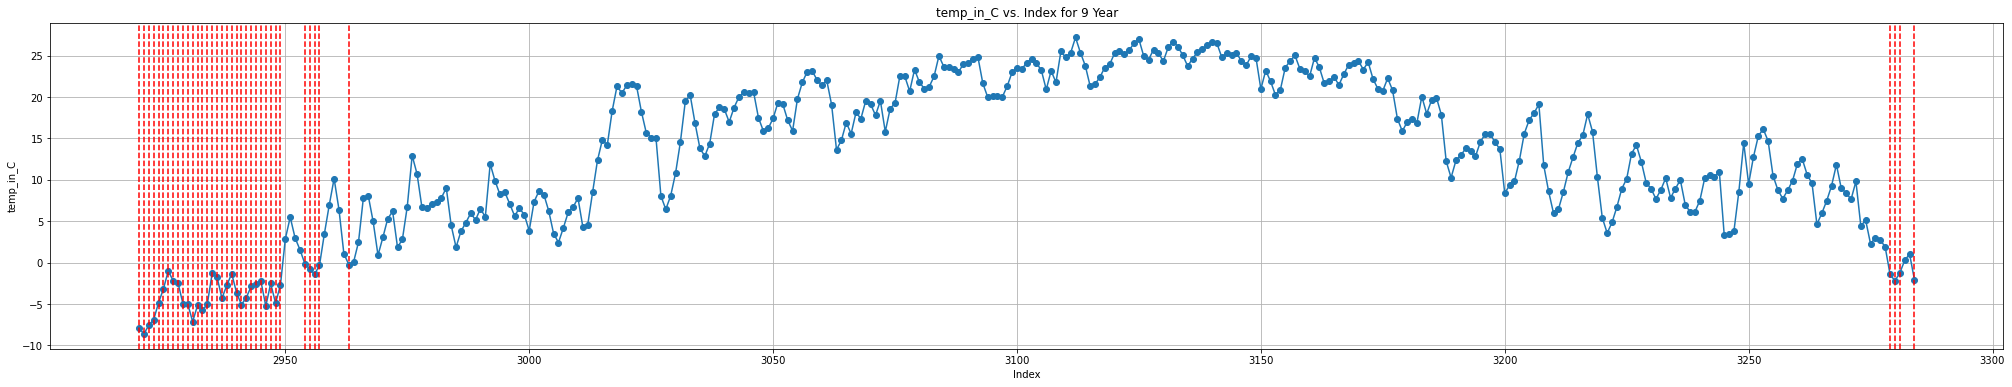

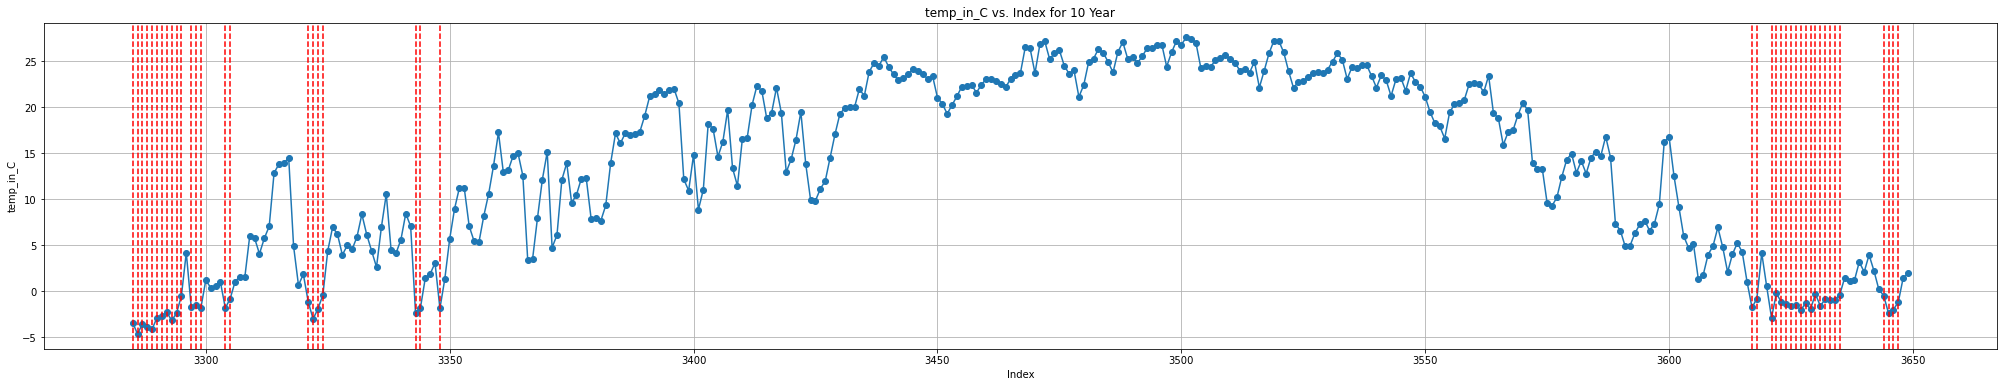

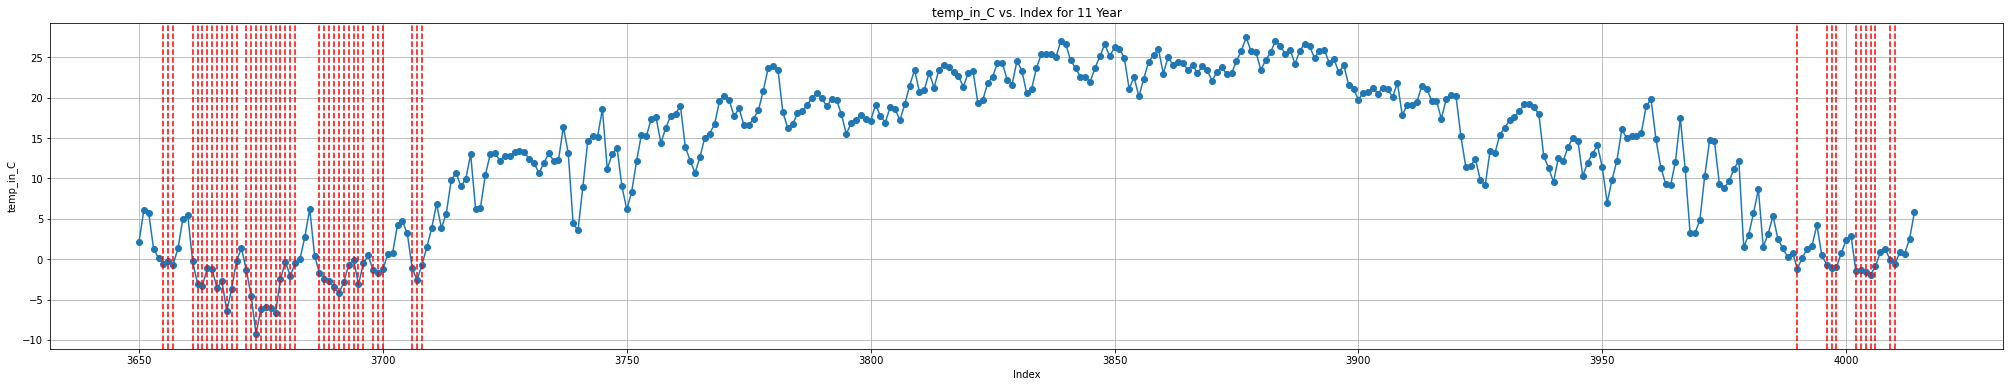

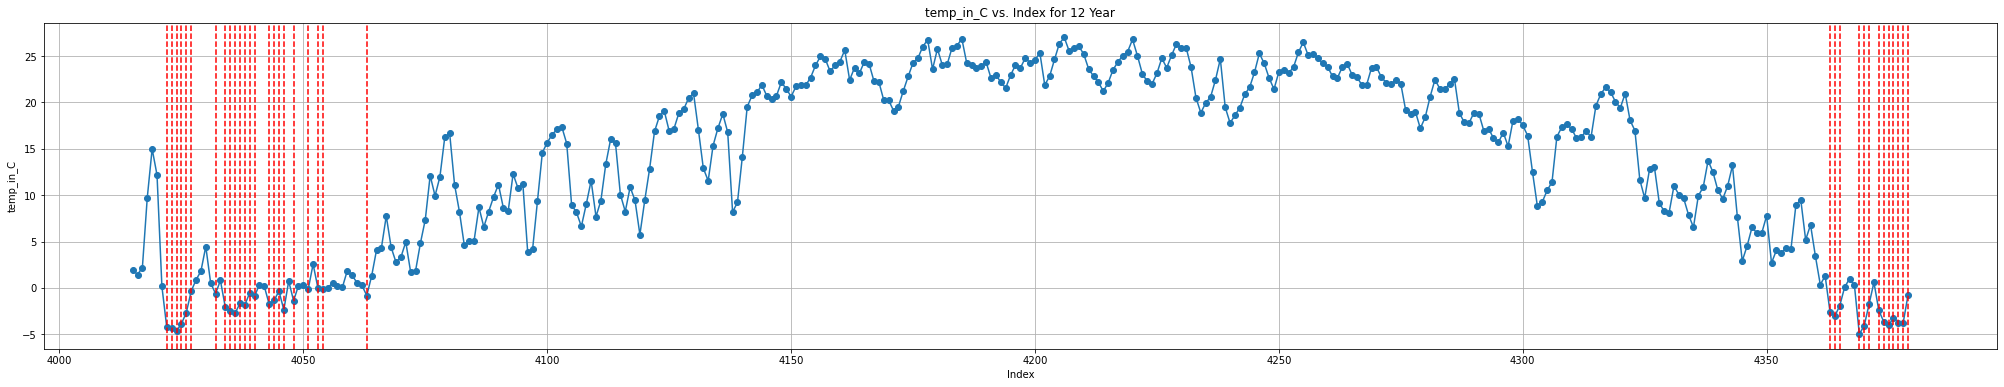

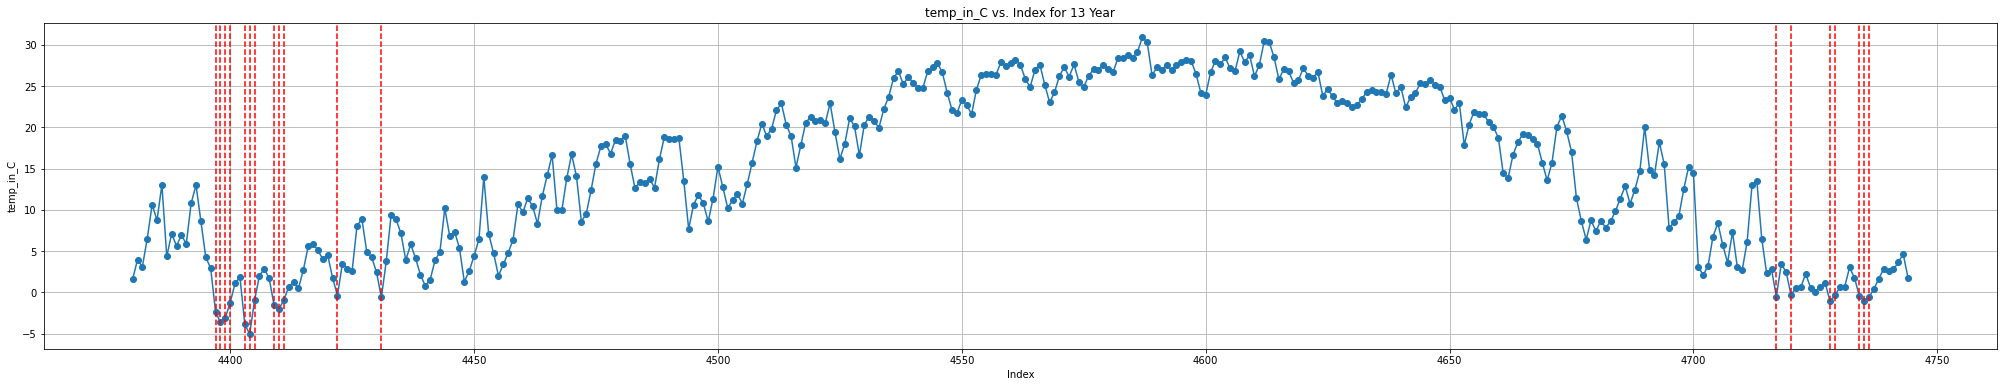

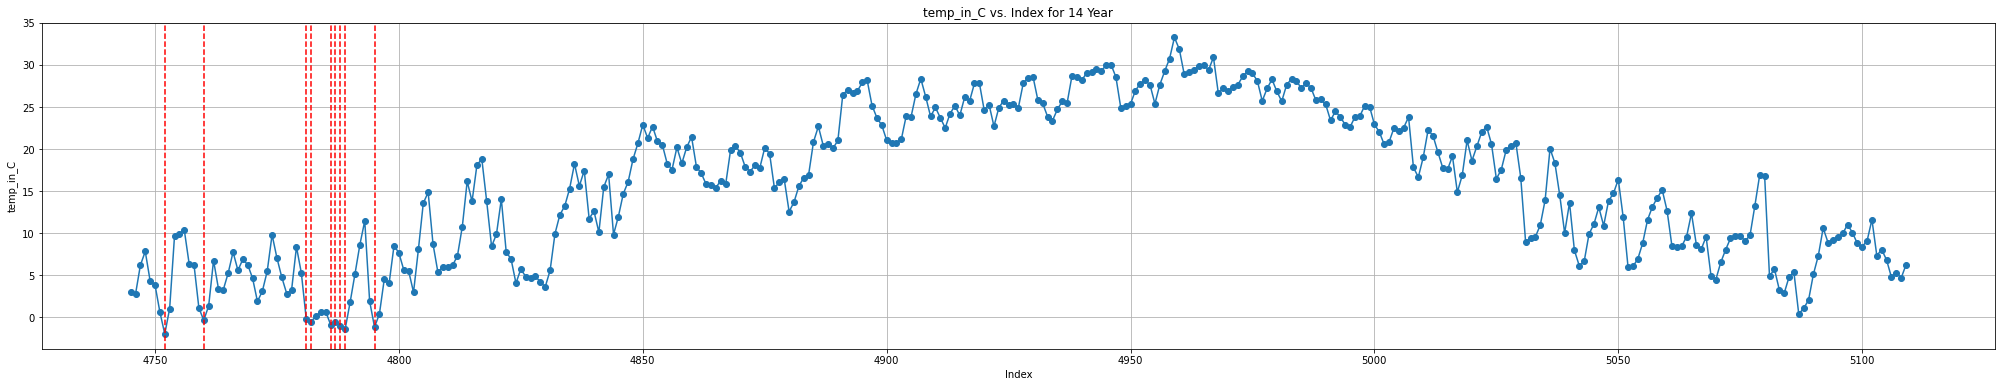

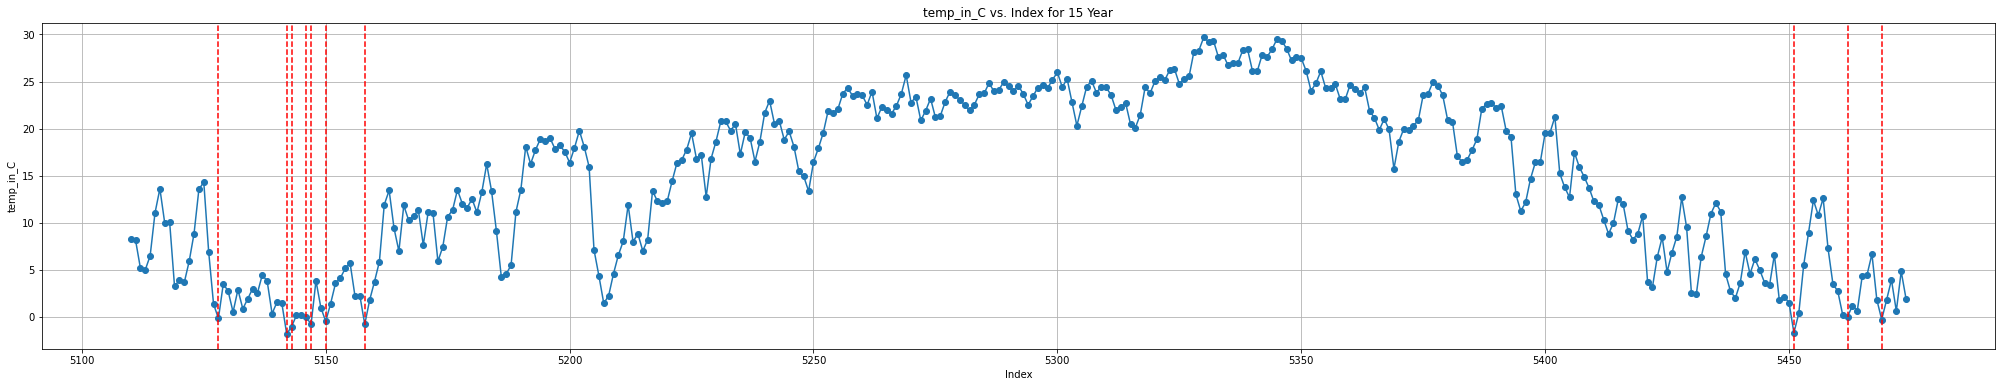

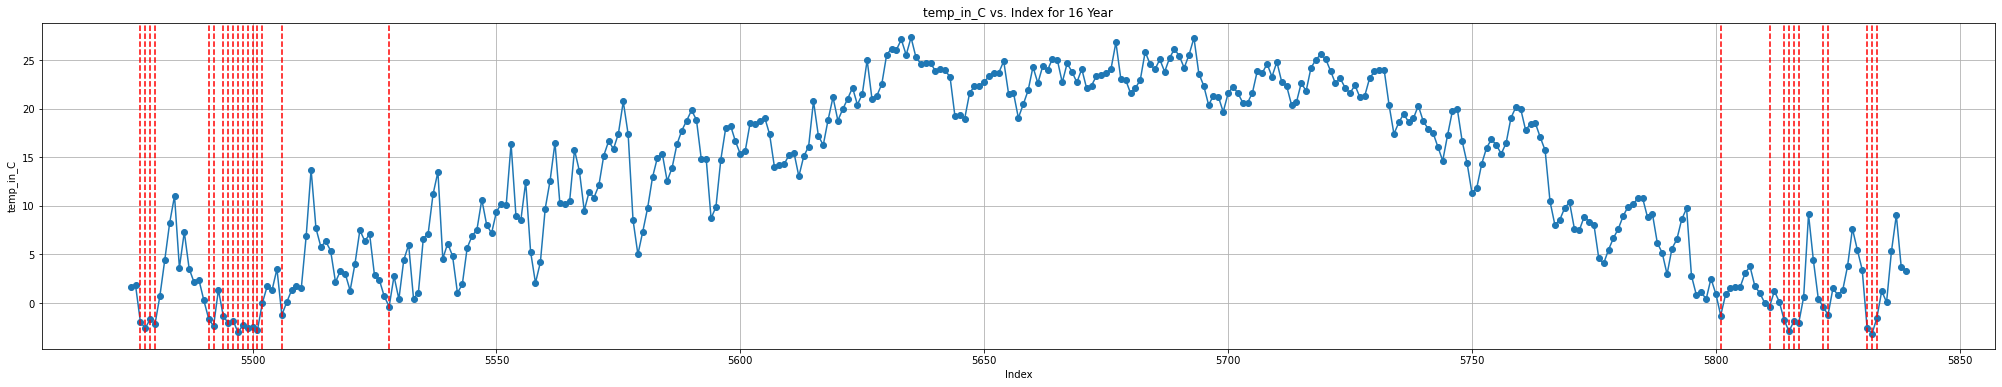

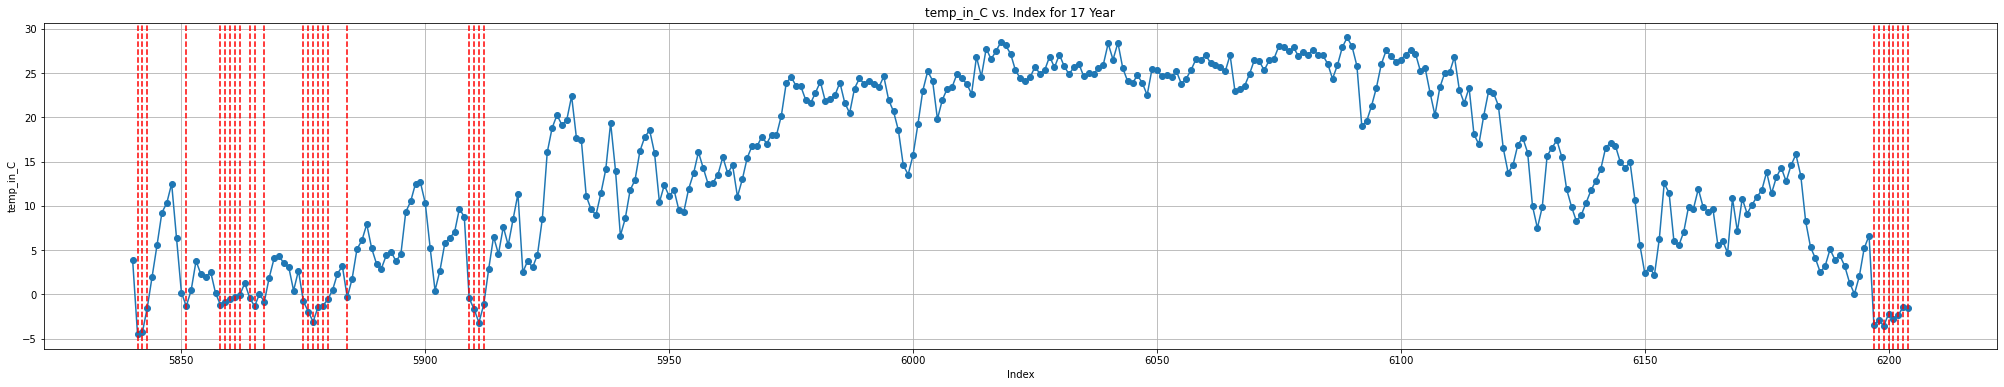

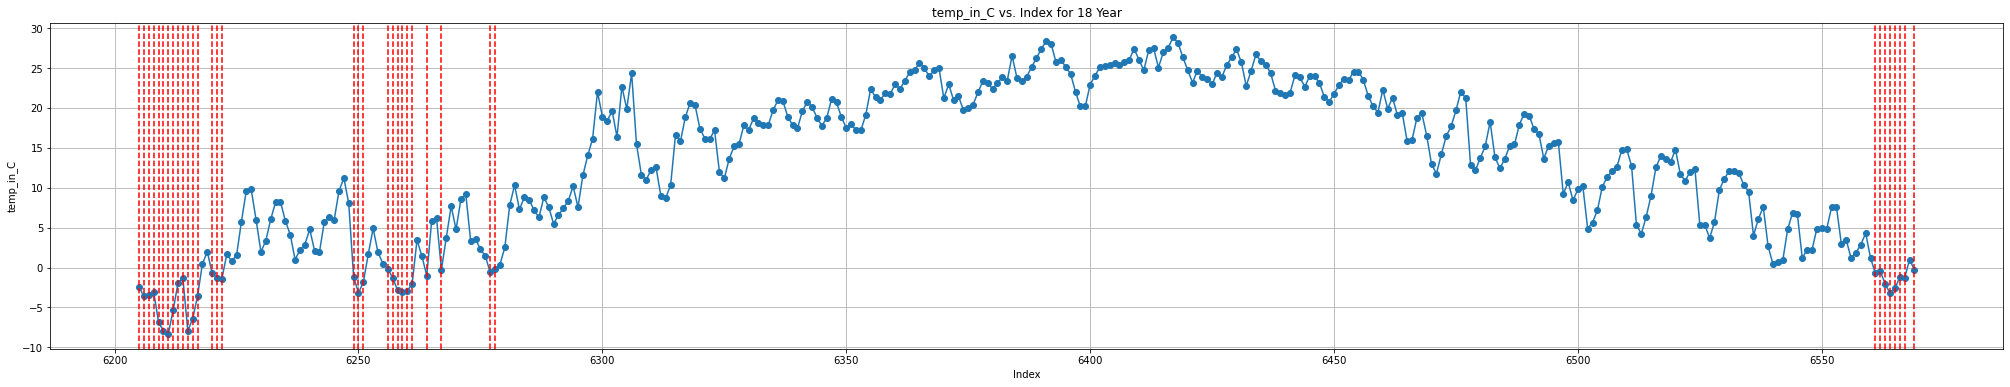

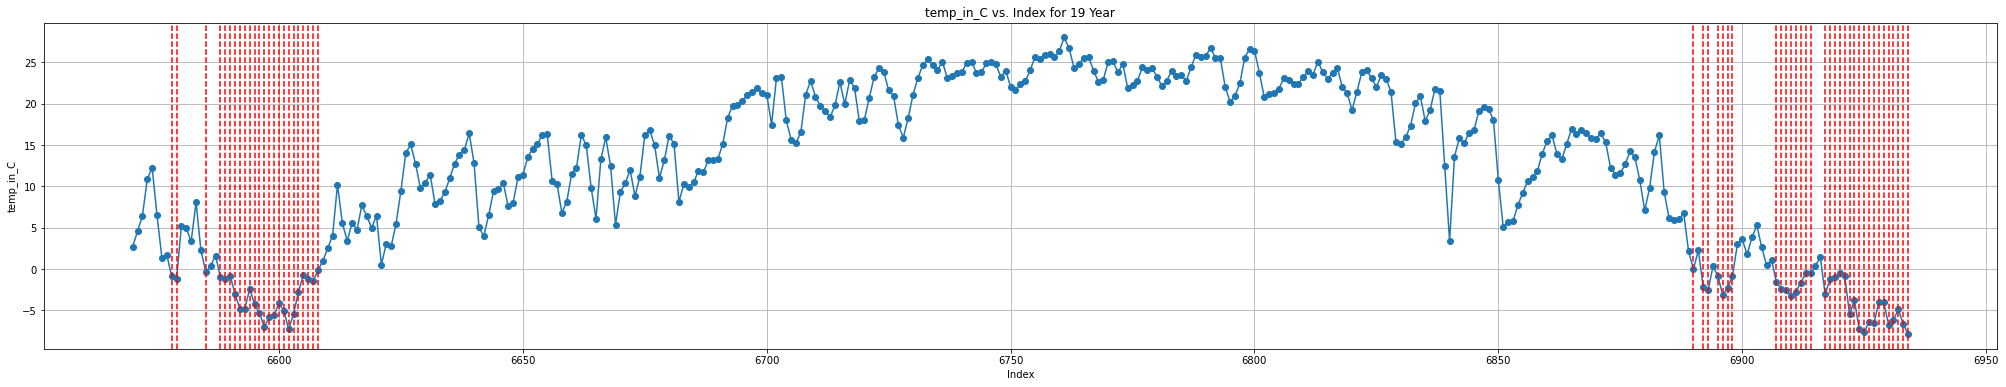

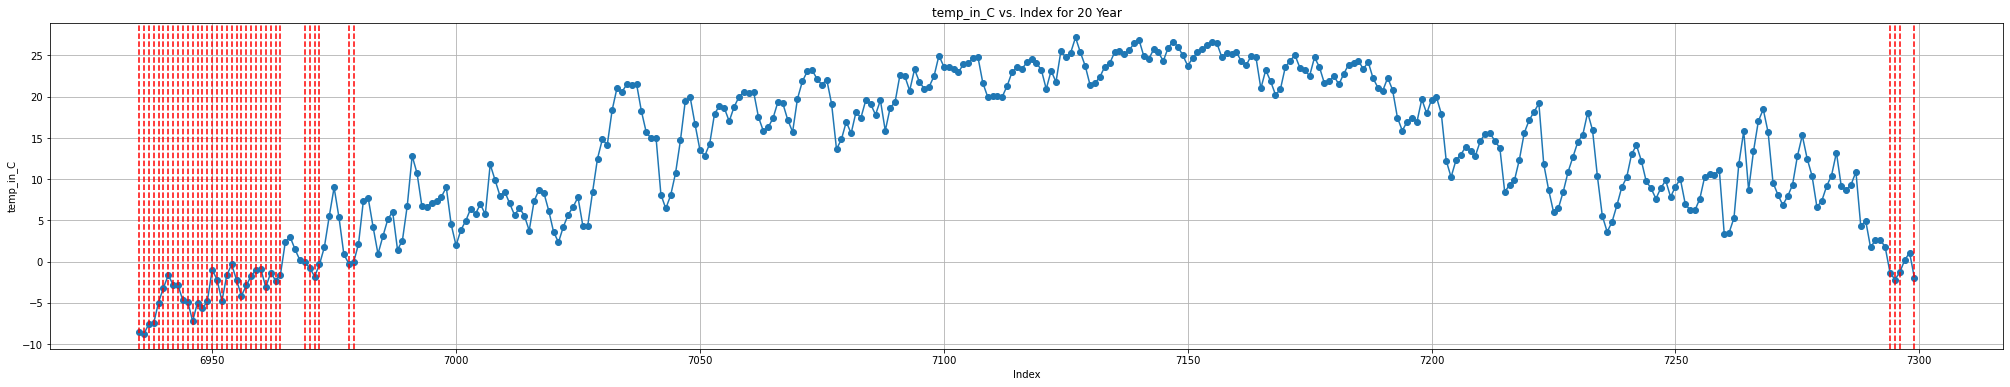

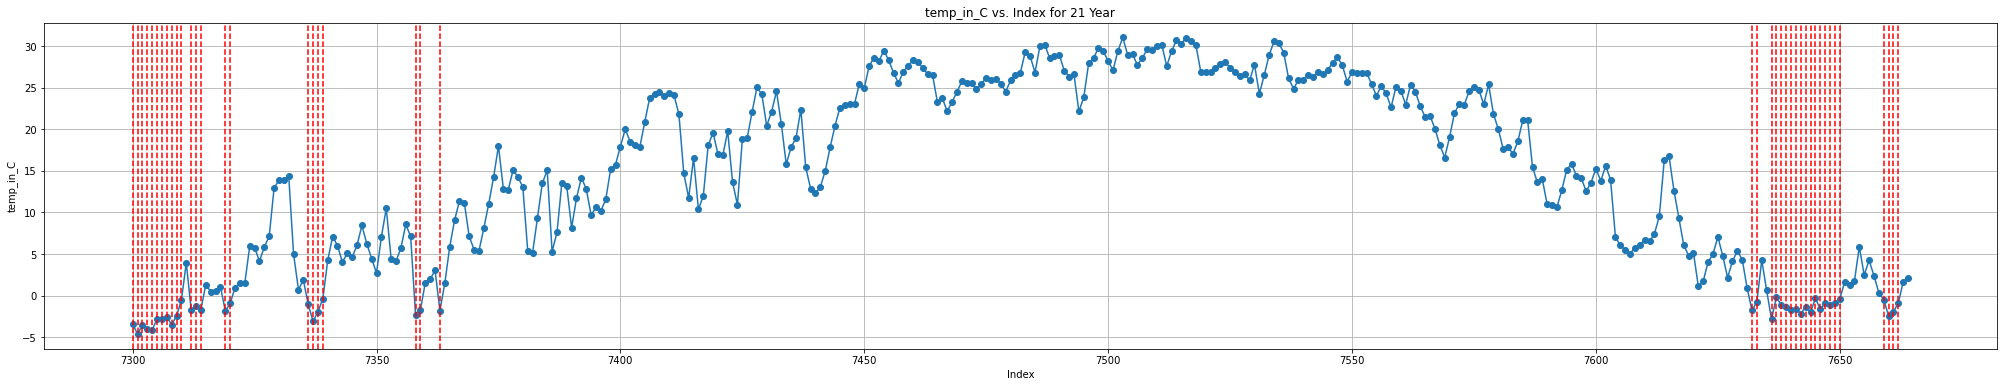

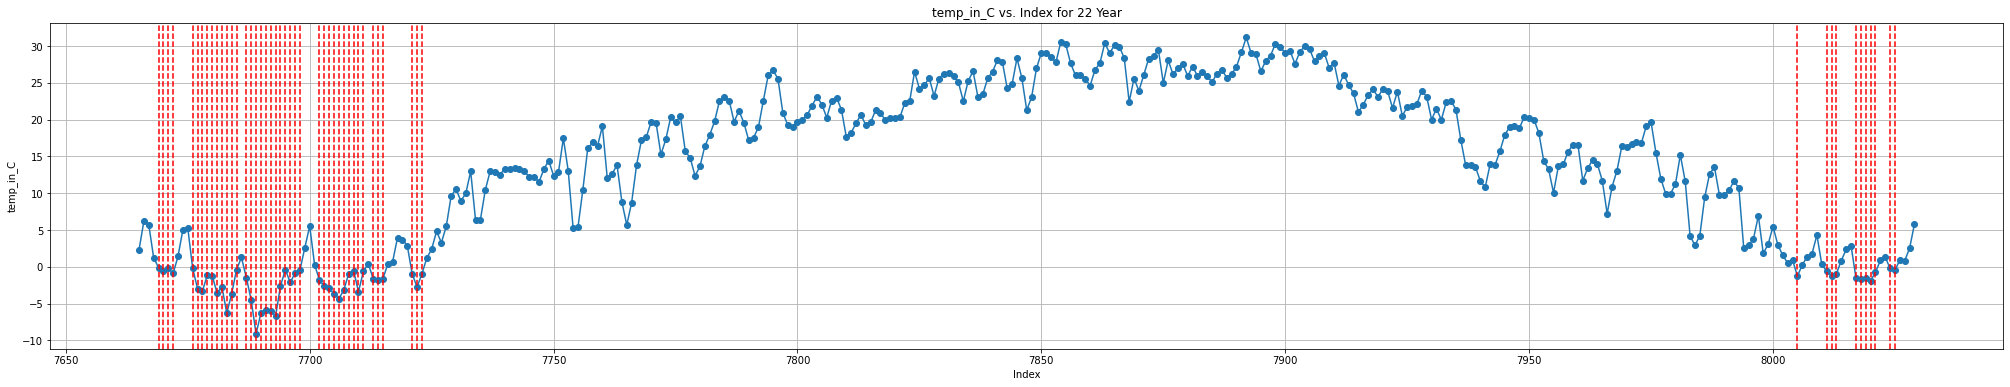

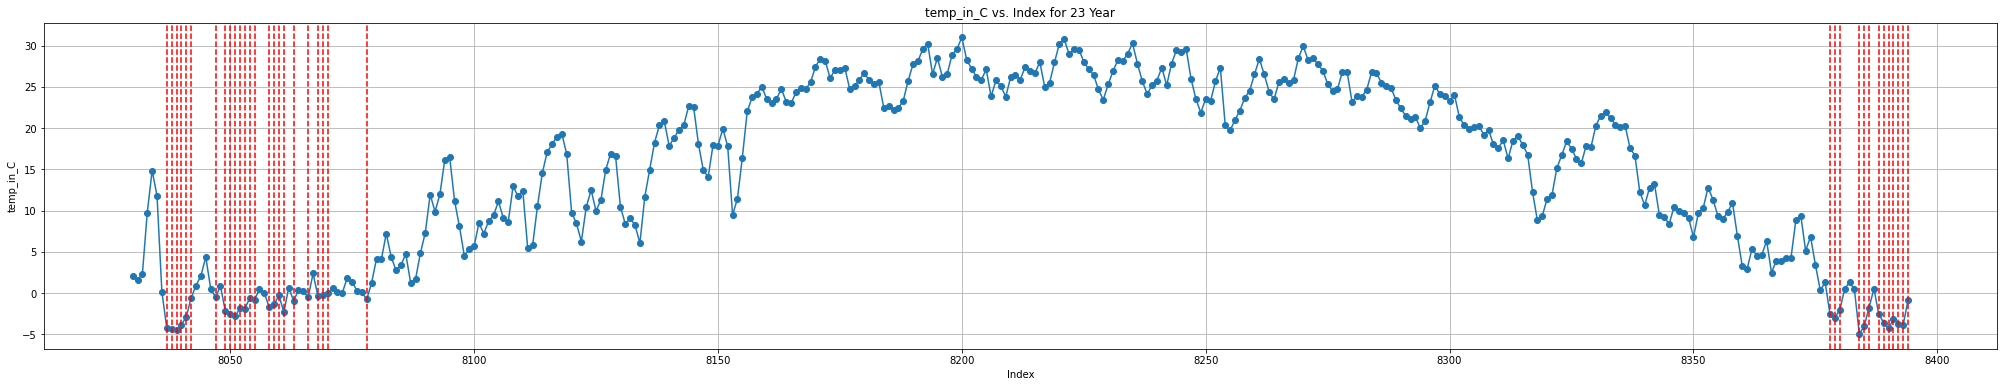

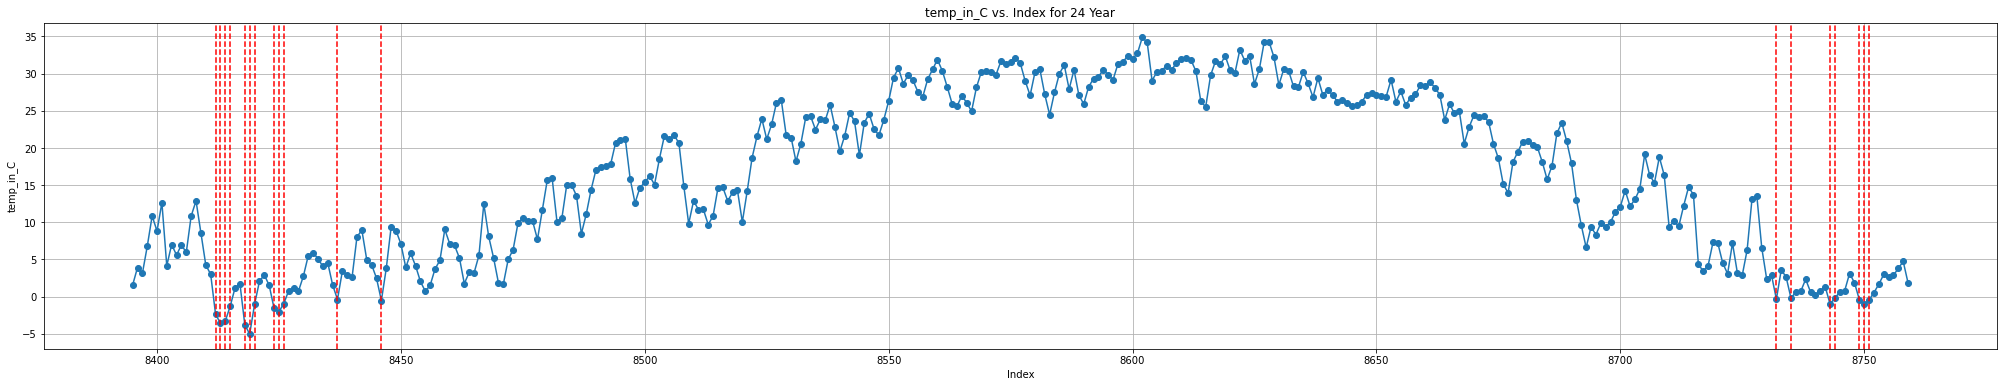

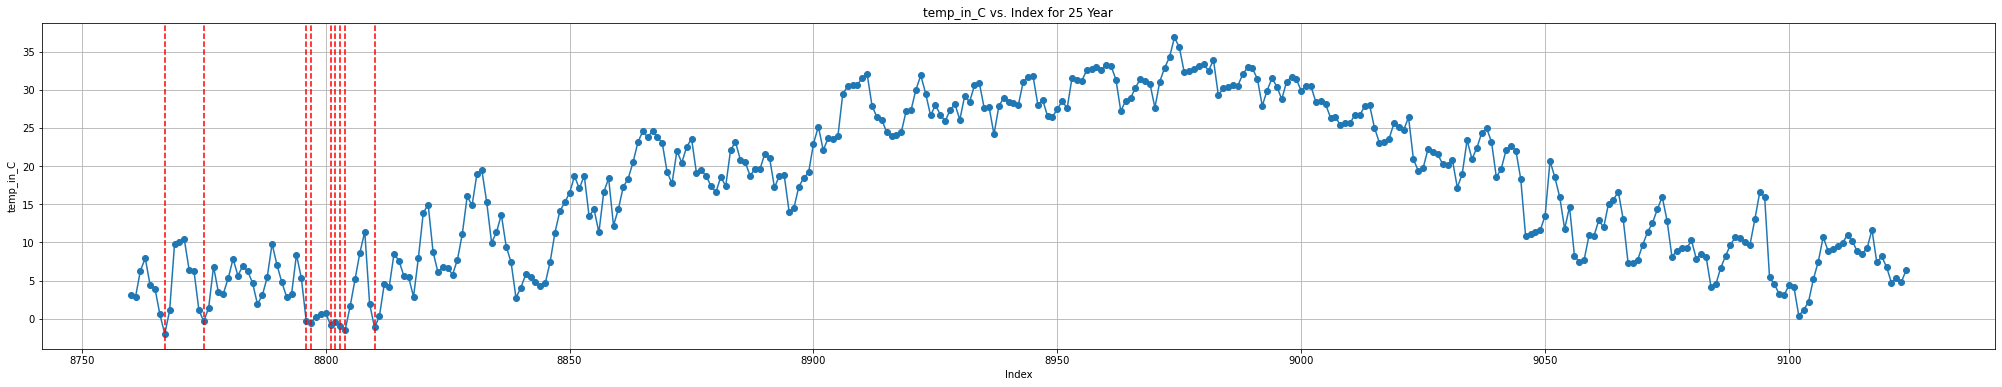

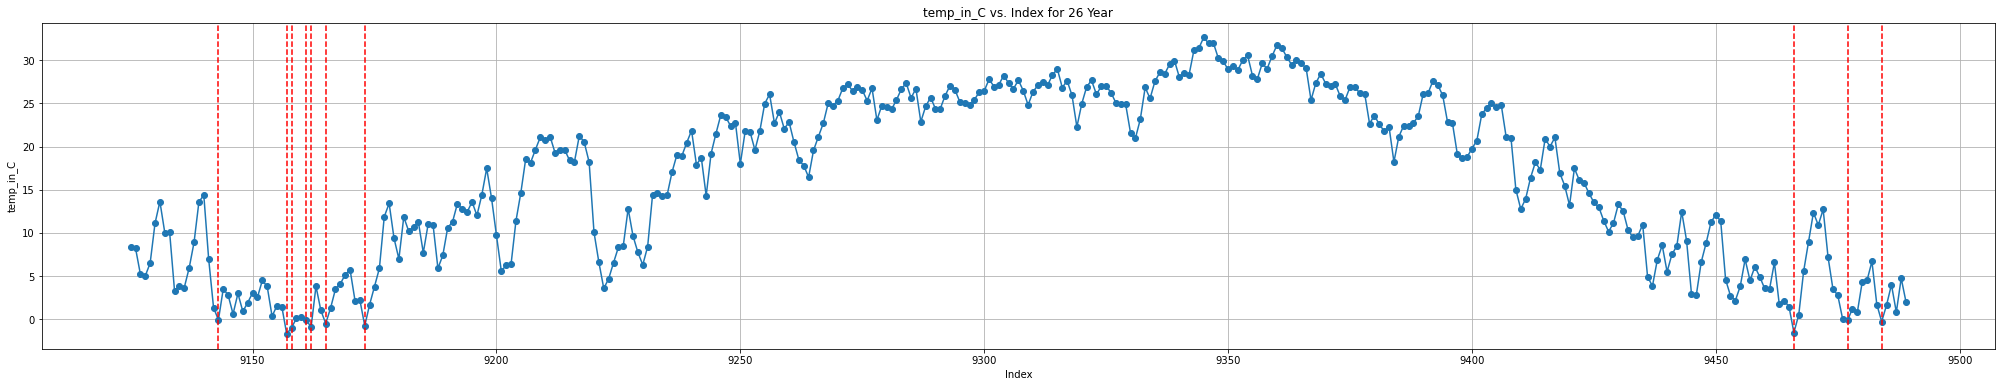

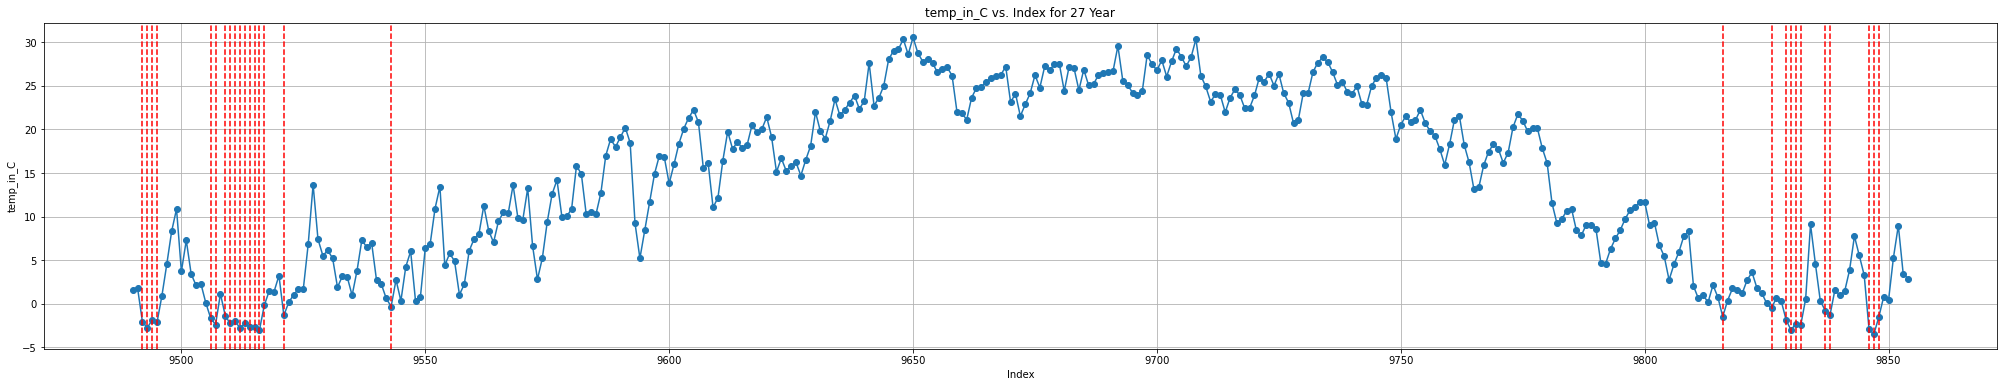

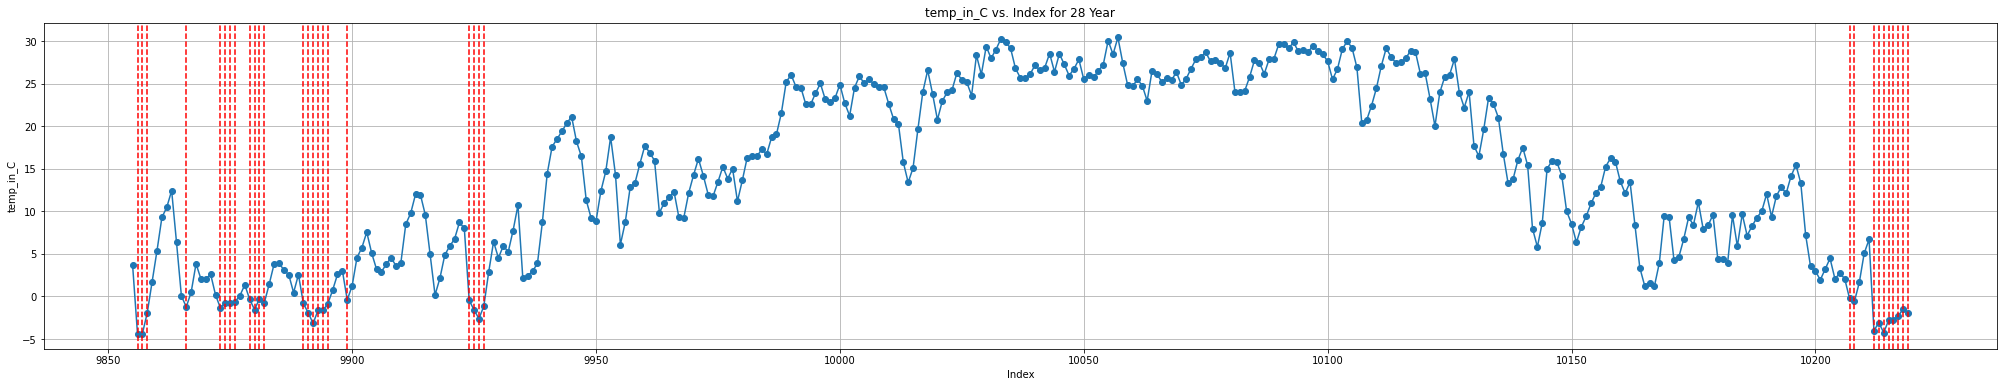

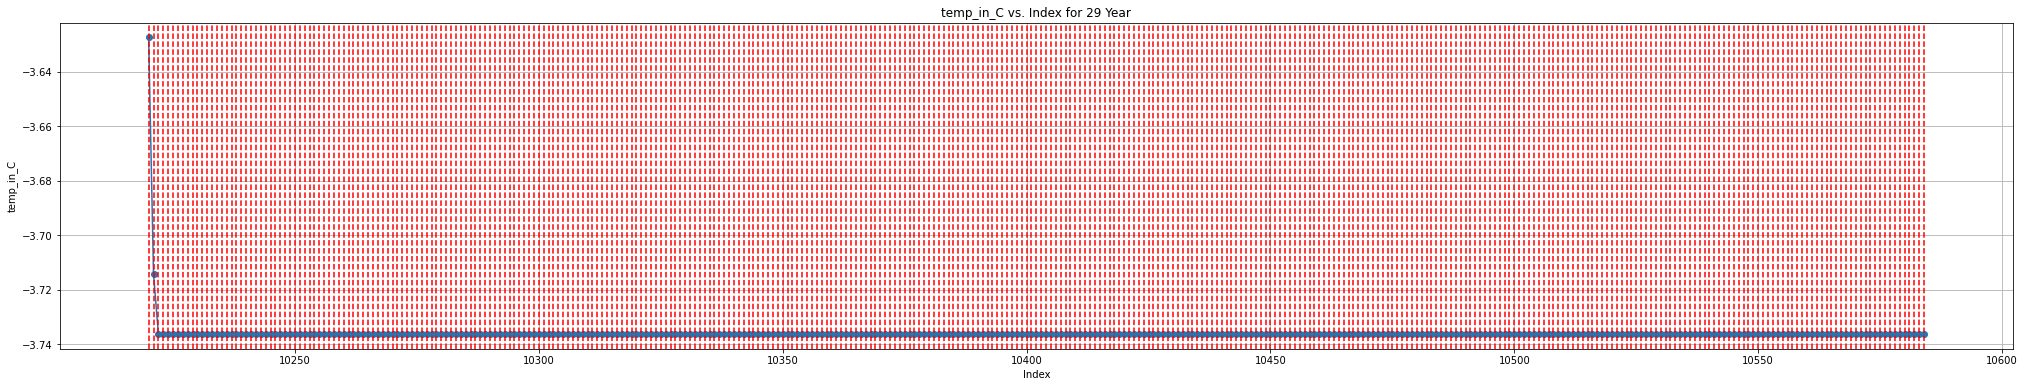

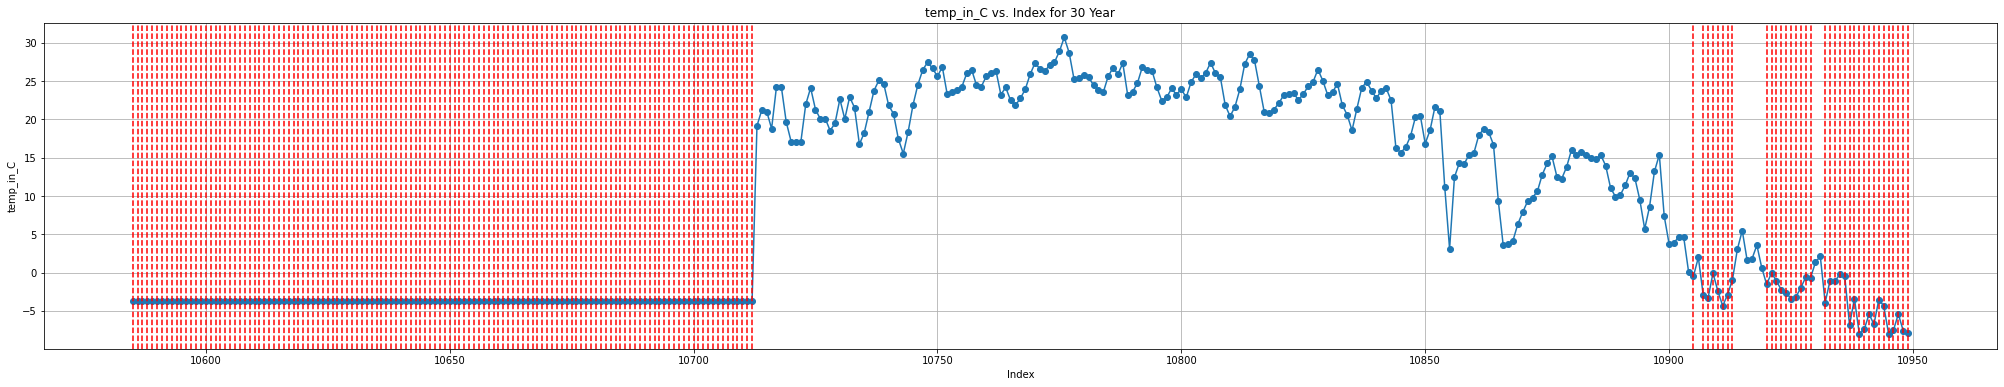

In [175]:
# Plotting
df_key = "sinkhole_phenology"
df_key_col = "temp_in_C"

for i in range(max_r_years):
    plt.figure(figsize=(35,6))
    
    if i>=1:
        plt.plot(dict_of_dataframes[f"{df_key}"].index[i*365:(i+1)*365], dict_of_dataframes[f"{df_key}"][f"{df_key_col}"][i*365:(i+1)*365], marker='o', linestyle='-')
    else:
        plt.plot(dict_of_dataframes[f"{df_key}"].index[i*365:(i+1)*365], dict_of_dataframes[f"{df_key}"][f"{df_key_col}"][i*365:(i+1)*365], marker='o', linestyle='-')
        
    zero_indices = dict_of_dataframes[df_key][(dict_of_dataframes[df_key][df_key_col] <= 0) & (dict_of_dataframes[df_key].index >= i * 365) & (dict_of_dataframes[df_key].index < (i + 1) * 365)].index
    for idx in zero_indices:
        plt.axvline(x=idx, color='red', linestyle='--')
    

            
    plt.xlabel('Index')
    plt.ylabel(f'{df_key_col}')
    plt.title(f'{df_key_col} vs. Index for {i+1} Year')
    plt.grid(True)
#for i in range(max_r_years):
#    plt.axvline(x = i*365, color = 'k',lw=5, alpha=.1)
#    if i%5==0:
#        plt.text(i*365,-10, int(i))
#plt.show()



In [165]:
subset

0      15.000000
1      -0.121430
2       1.837144
3      12.345837
4      16.943635
         ...    
360    -6.085371
361    -4.839862
362    -4.965080
363    -3.707380
364    -1.215918
Name: temp_in_C, Length: 365, dtype: float64

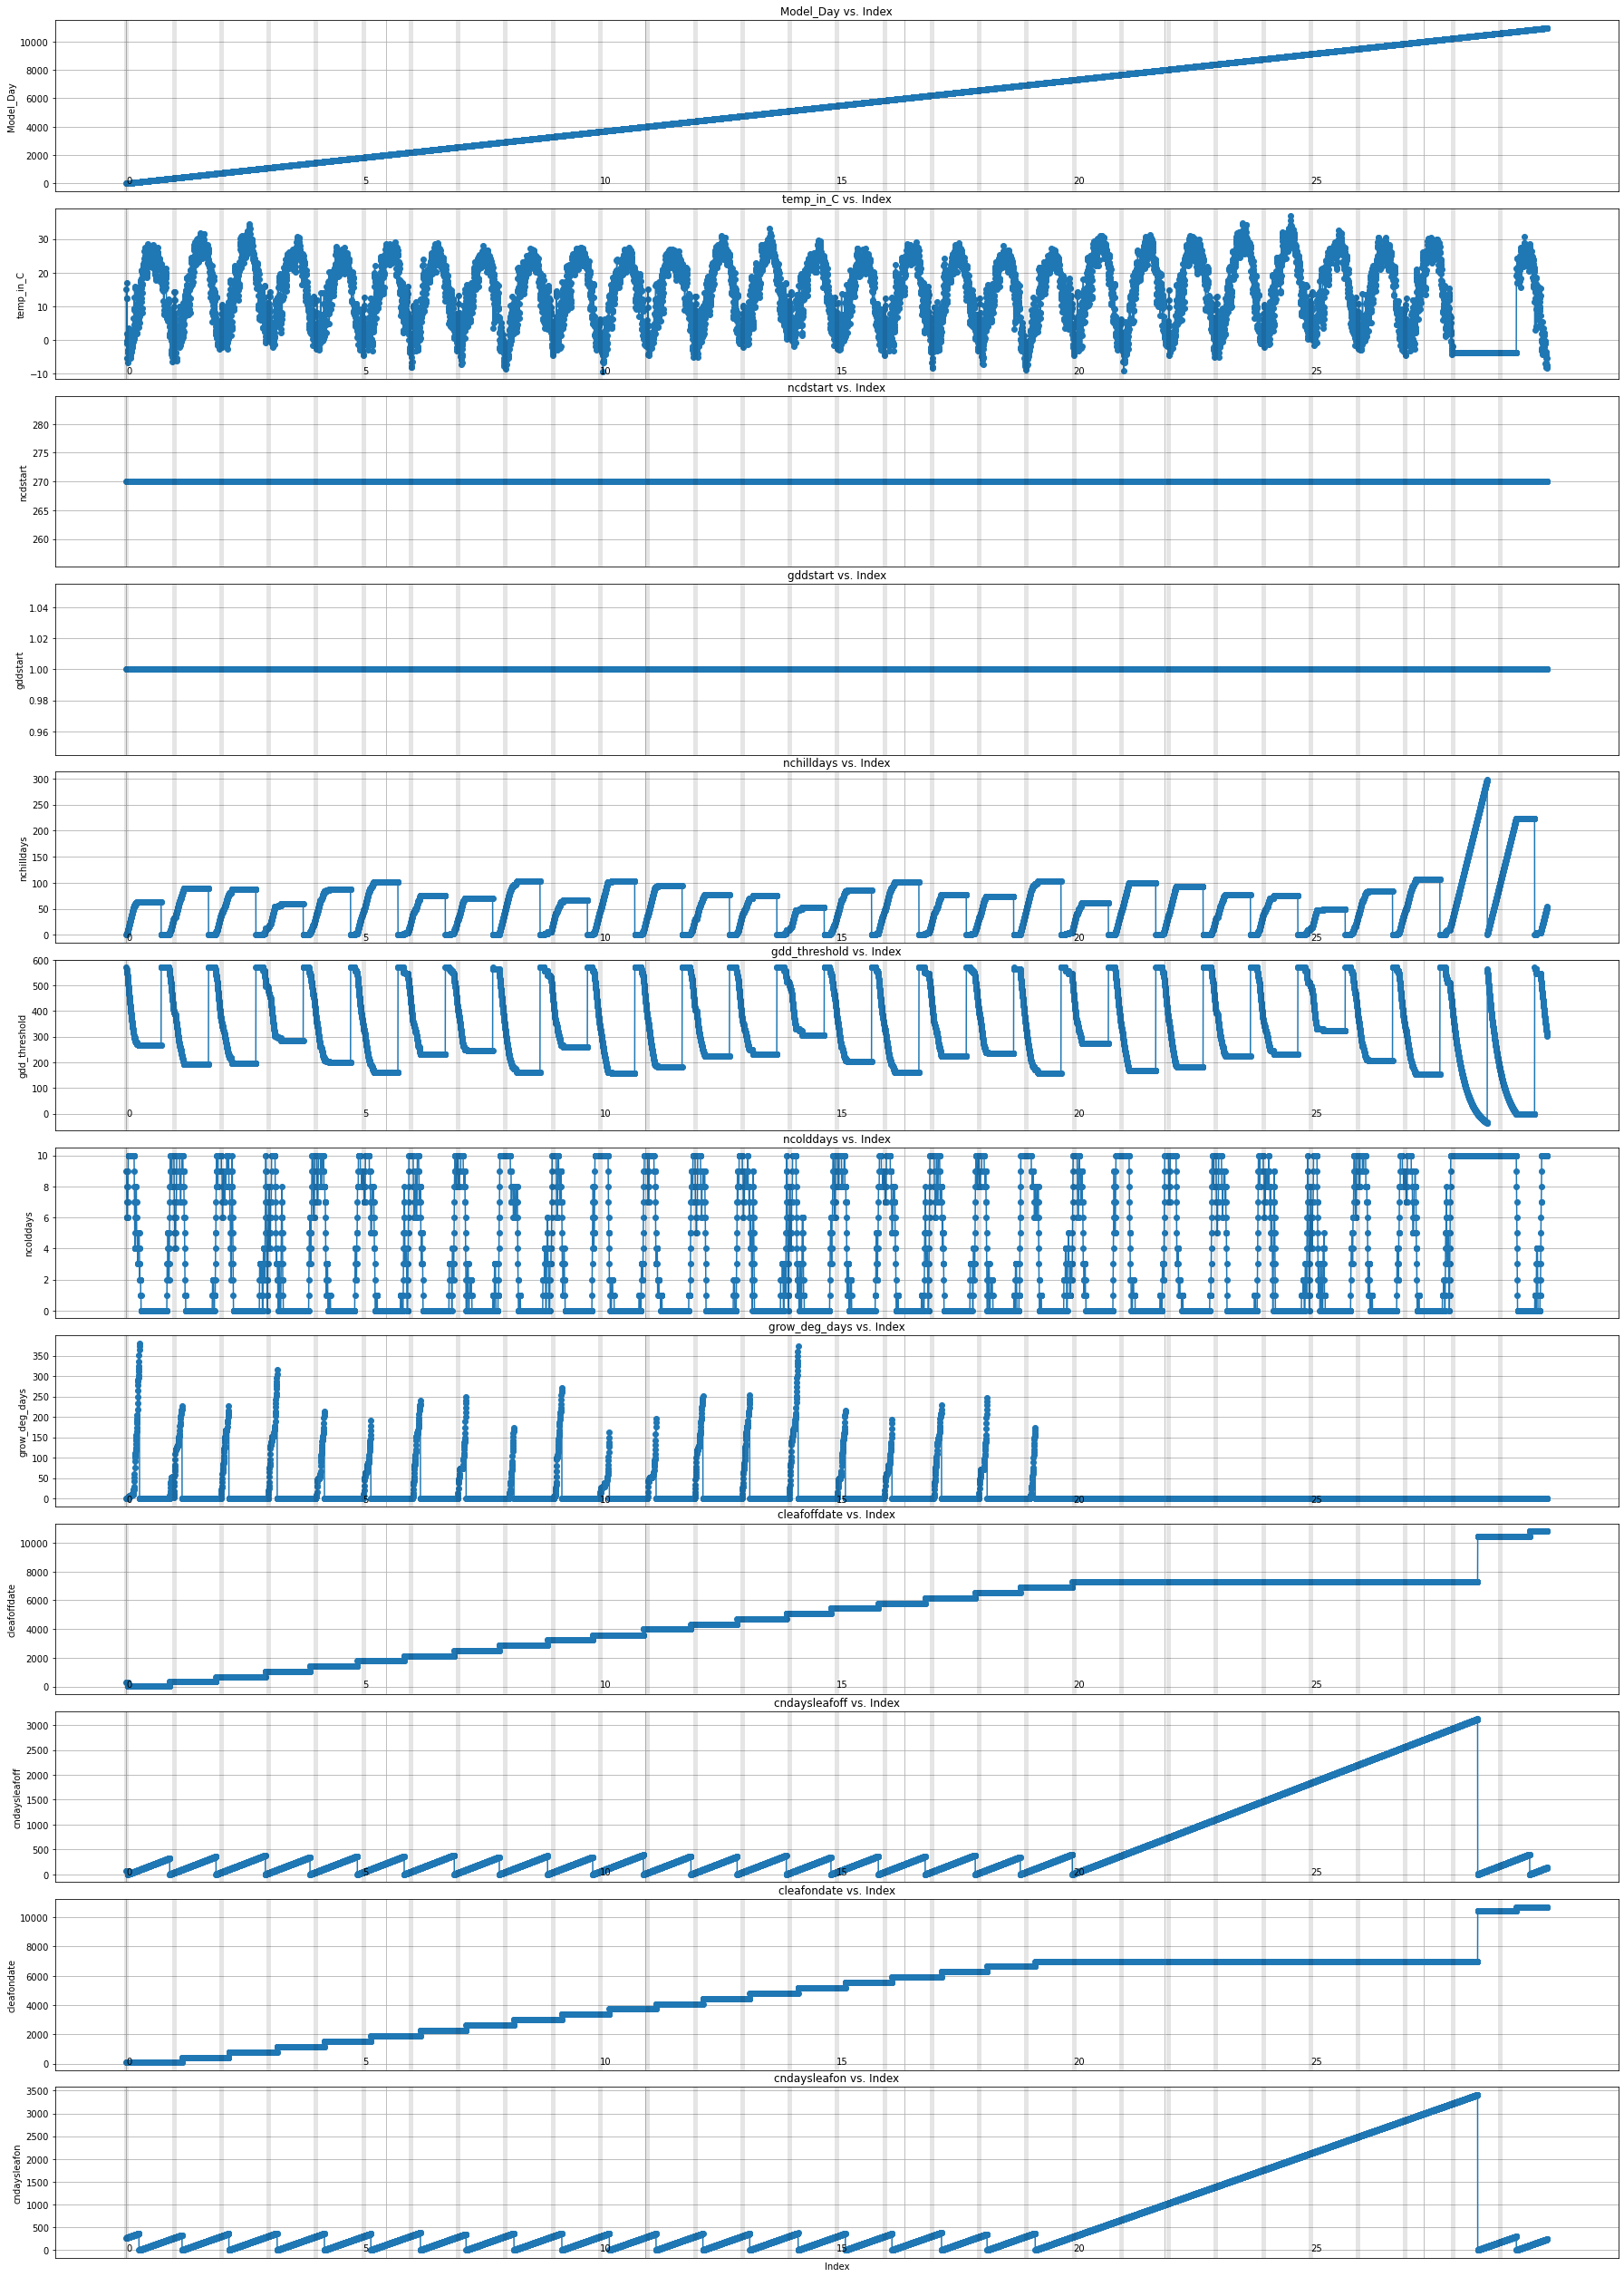

In [132]:
import matplotlib.pyplot as plt

# Assuming ict_of_dataframes is a dictionary of dataframes
# Define the number of rows and columns for subplots
df_key = "sinkhole_phenology"
num_rows = len(dict_of_dataframes[f'{df_key}'].columns[1:]) # Number of rows for subplots
num_cols = 1  # Number of columns for subplots

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 35))

# Iterate over dataframes and plot each one on a separate subplot
for idx, df_key_col in enumerate(dict_of_dataframes[f'{df_key}'].columns[1:]):    
    axes[idx].plot(dict_of_dataframes[f"{df_key}"].index, dict_of_dataframes[f"{df_key}"][f"{df_key_col}"], marker='o', linestyle='-', label=key)
    axes[idx].set_ylabel(f'{df_key_col}')
    axes[idx].set_title(f'{df_key_col} vs. Index')
    axes[idx].grid(True)
    #axes[row_idx].legend()
    axes[idx].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    
    for i in range(max_r_years):
        axes[idx].axvline(x = i*365, color = 'k',lw=5, alpha=.1)
        if (i%5==0) and (idx not in [2,3]):
            axes[idx].text(i*365,-10, int(i))

axes[idx].set_xlabel('Index')
# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.1) 
plt.show()


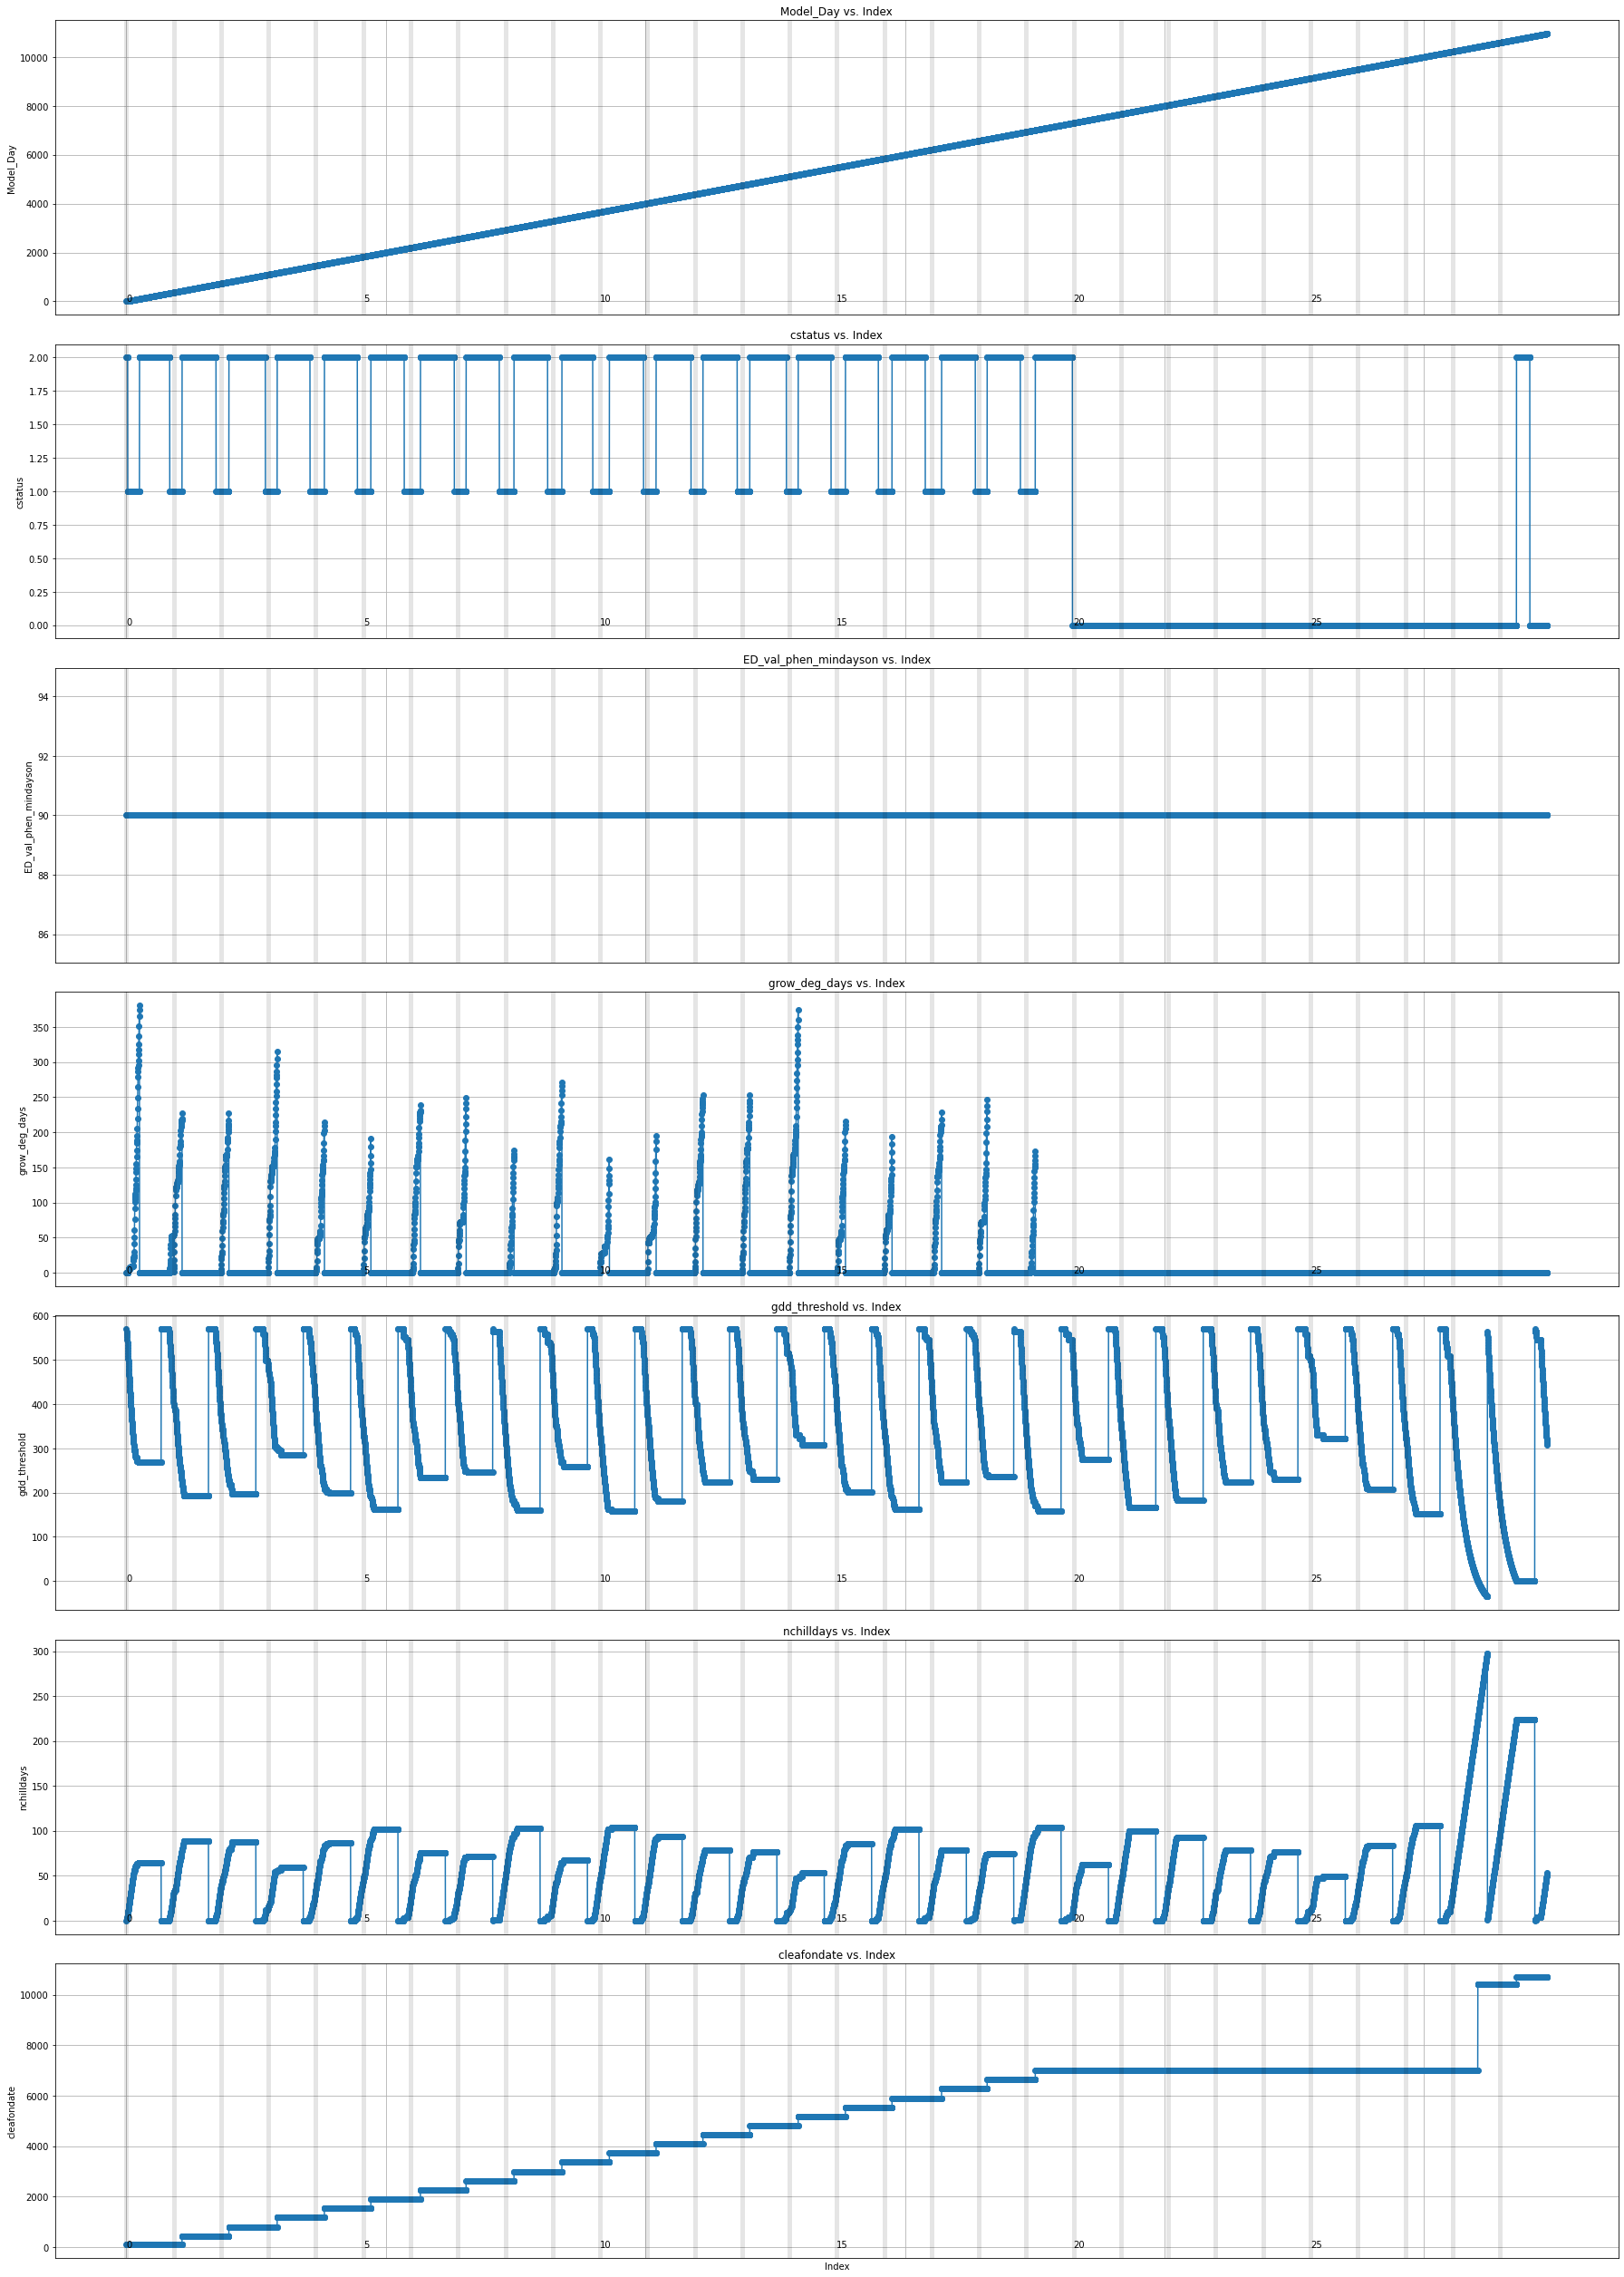

In [142]:
import matplotlib.pyplot as plt

# Assuming ict_of_dataframes is a dictionary of dataframes
# Define the number of rows and columns for subplots
df_key = "sinkhole_phenology_LOn1"
num_rows = len(dict_of_dataframes[f'{df_key}'].columns[1:]) # Number of rows for subplots
num_cols = 1  # Number of columns for subplots

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 35))

# Iterate over dataframes and plot each one on a separate subplot
for idx, df_key_col in enumerate(dict_of_dataframes[f'{df_key}'].columns[1:]):    
    axes[idx].plot(dict_of_dataframes[f"{df_key}"].index, dict_of_dataframes[f"{df_key}"][f"{df_key_col}"], marker='o', linestyle='-', label=key)
    axes[idx].set_ylabel(f'{df_key_col}')
    axes[idx].set_title(f'{df_key_col} vs. Index')
    axes[idx].grid(True)
    #axes[row_idx].legend()
    axes[idx].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    
    for i in range(max_r_years):
        axes[idx].axvline(x = i*365, color = 'k',lw=5, alpha=.1)
        if (i%5==0) and (idx not in [2]):
            axes[idx].text(i*365,0, int(i))

axes[idx].set_xlabel('Index')
# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.1) 
plt.show()


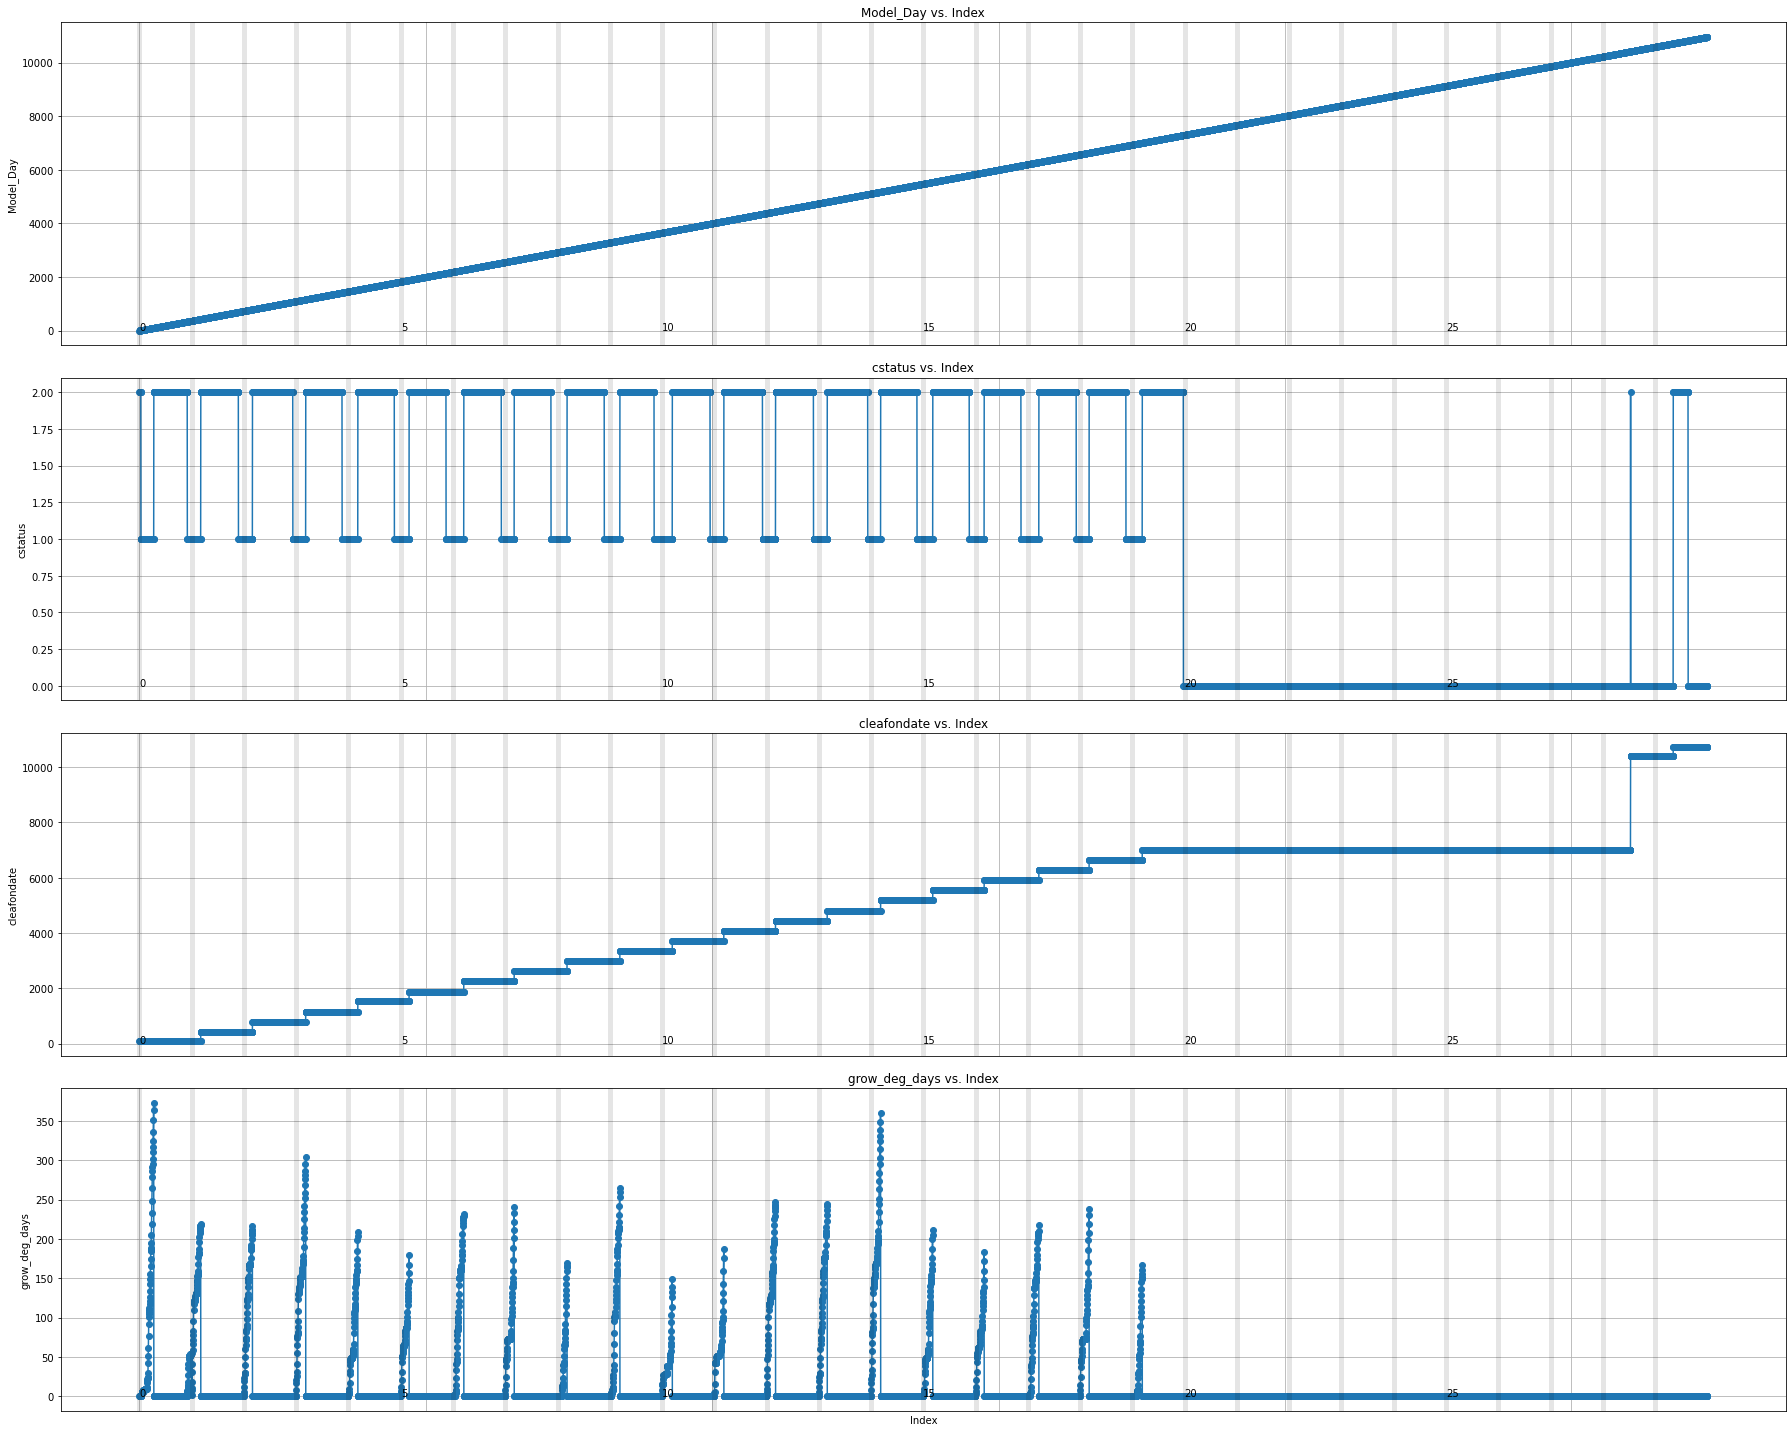

In [143]:
import matplotlib.pyplot as plt

# Assuming ict_of_dataframes is a dictionary of dataframes
# Define the number of rows and columns for subplots
df_key = "sinkhole_phenology_LOn2"
num_rows = len(dict_of_dataframes[f'{df_key}'].columns[1:]) # Number of rows for subplots
num_cols = 1  # Number of columns for subplots

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

# Iterate over dataframes and plot each one on a separate subplot
for idx, df_key_col in enumerate(dict_of_dataframes[f'{df_key}'].columns[1:]):    
    axes[idx].plot(dict_of_dataframes[f"{df_key}"].index, dict_of_dataframes[f"{df_key}"][f"{df_key_col}"], marker='o', linestyle='-', label=key)
    axes[idx].set_ylabel(f'{df_key_col}')
    axes[idx].set_title(f'{df_key_col} vs. Index')
    axes[idx].grid(True)
    #axes[row_idx].legend()
    axes[idx].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    
    for i in range(max_r_years):
        axes[idx].axvline(x = i*365, color = 'k',lw=5, alpha=.1)
        if (i%5==0) and (idx not in []):
            axes[idx].text(i*365,0, int(i))

axes[idx].set_xlabel('Index')
# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.1) 
plt.show()


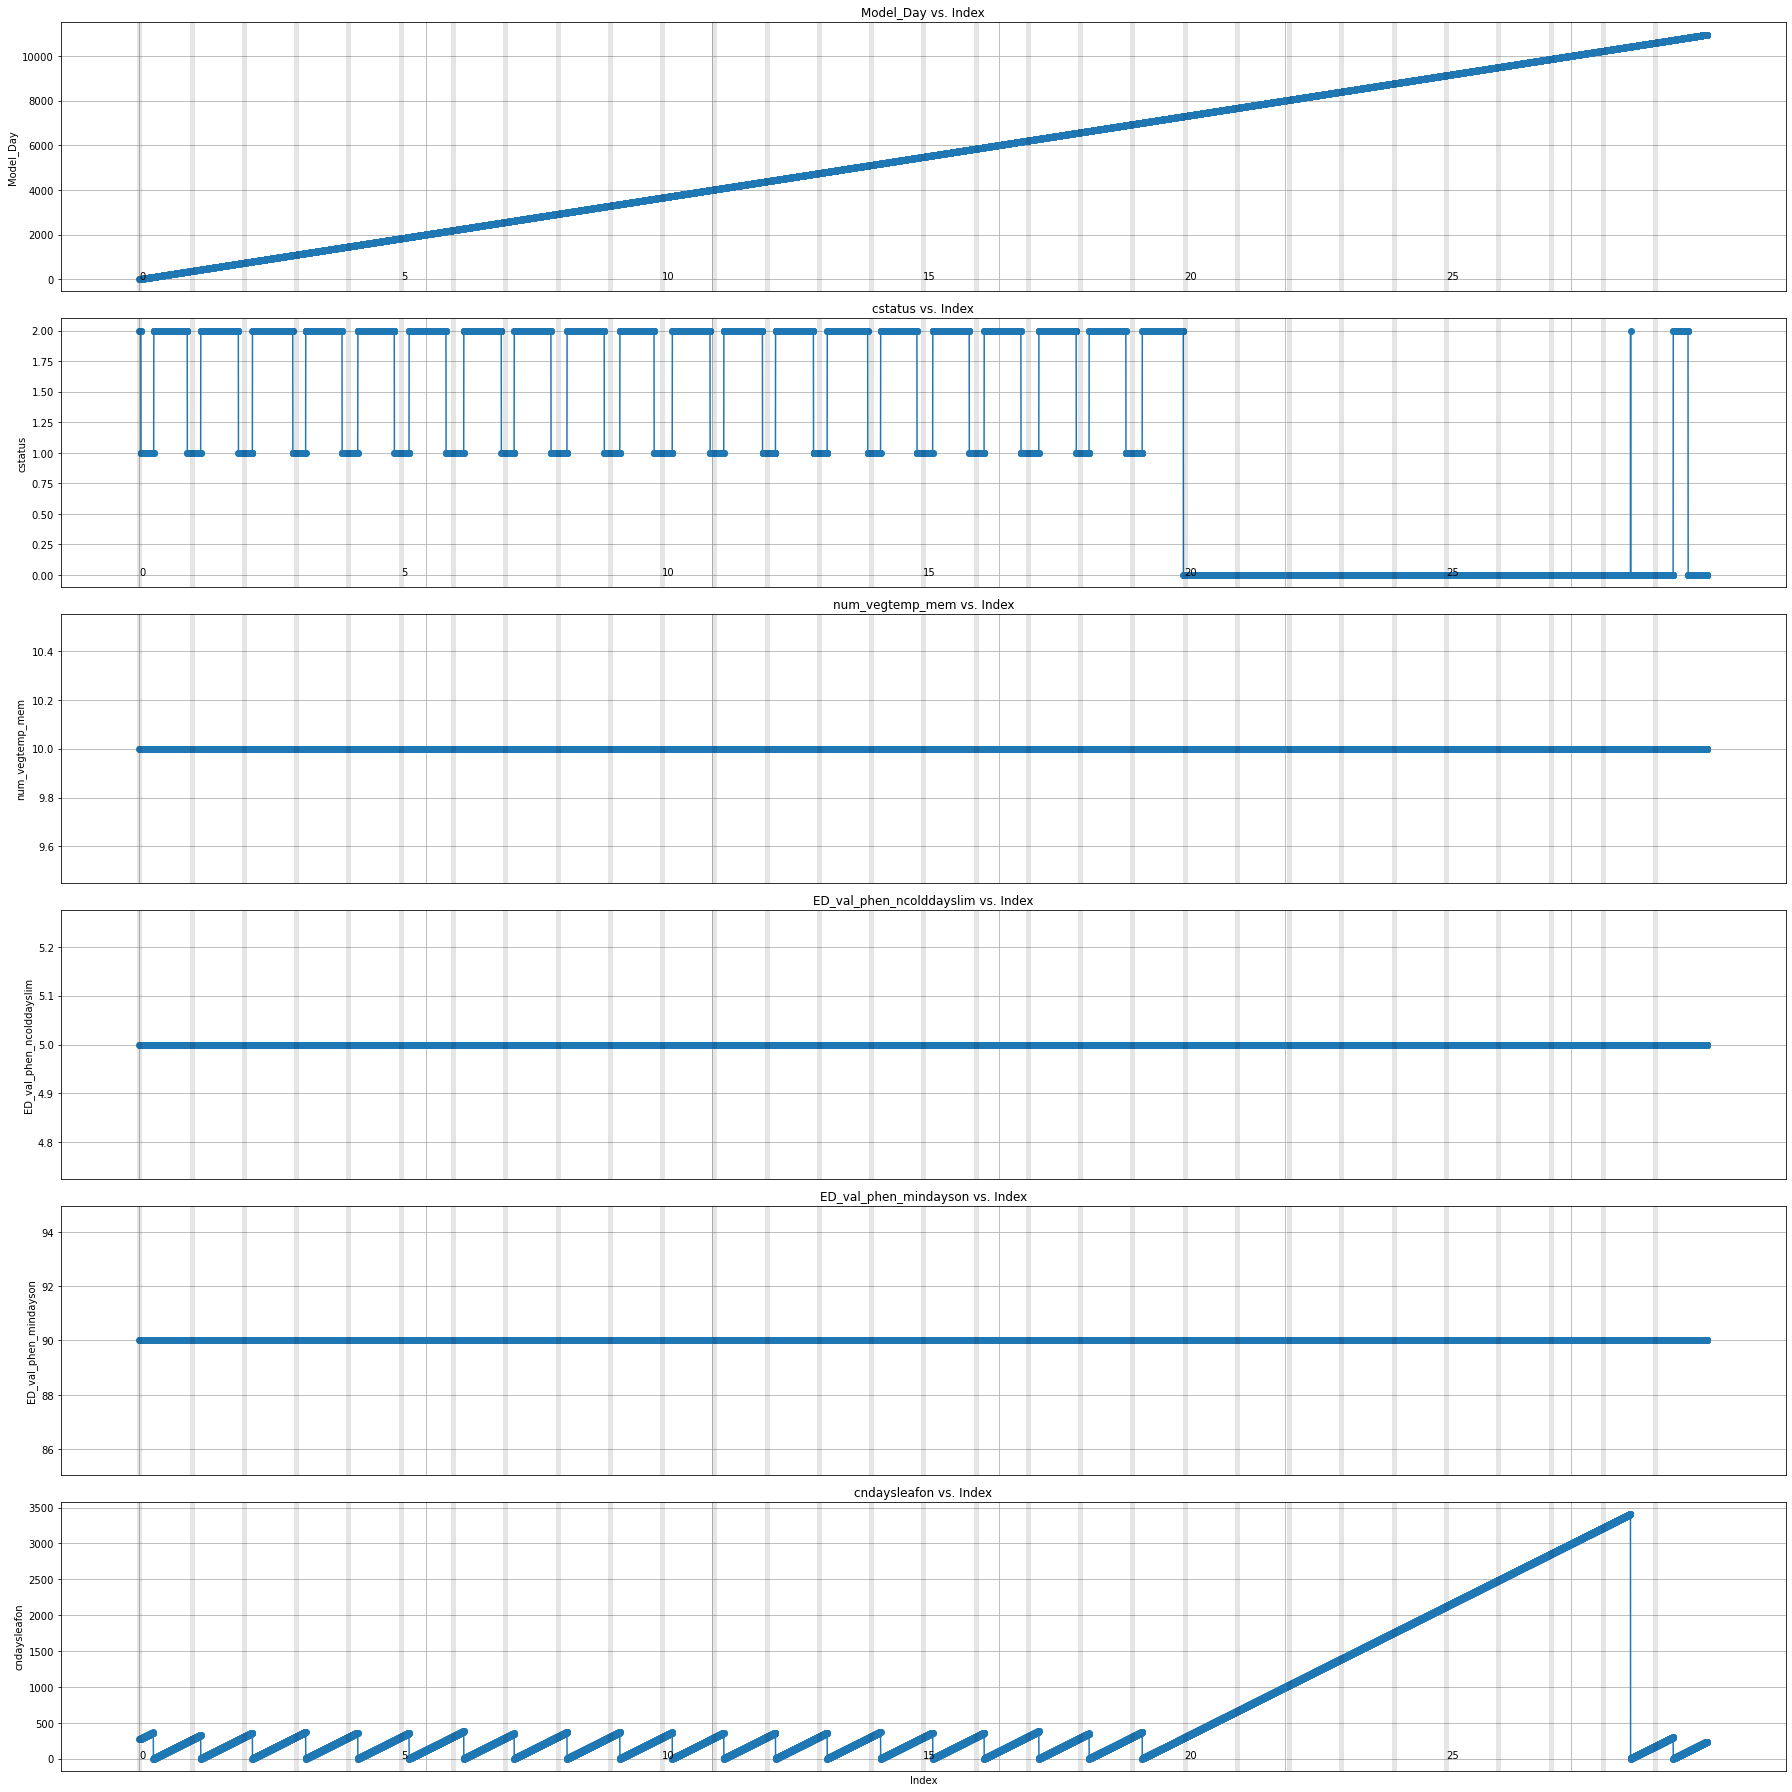

In [146]:
import matplotlib.pyplot as plt

# Assuming ict_of_dataframes is a dictionary of dataframes
# Define the number of rows and columns for subplots
df_key = "sinkhole_phenology_LOff1"
num_rows = len(dict_of_dataframes[f'{df_key}'].columns[1:]) # Number of rows for subplots
num_cols = 1  # Number of columns for subplots

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 25))

# Iterate over dataframes and plot each one on a separate subplot
for idx, df_key_col in enumerate(dict_of_dataframes[f'{df_key}'].columns[1:]):    
    axes[idx].plot(dict_of_dataframes[f"{df_key}"].index, dict_of_dataframes[f"{df_key}"][f"{df_key_col}"], marker='o', linestyle='-', label=key)
    axes[idx].set_ylabel(f'{df_key_col}')
    axes[idx].set_title(f'{df_key_col} vs. Index')
    axes[idx].grid(True)
    #axes[row_idx].legend()
    axes[idx].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    
    for i in range(max_r_years):
        axes[idx].axvline(x = i*365, color = 'k',lw=5, alpha=.1)
        if (i%5==0) and (idx not in [2,3,4]):
            axes[idx].text(i*365,0, int(i))

axes[idx].set_xlabel('Index')
# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.1) 
plt.show()


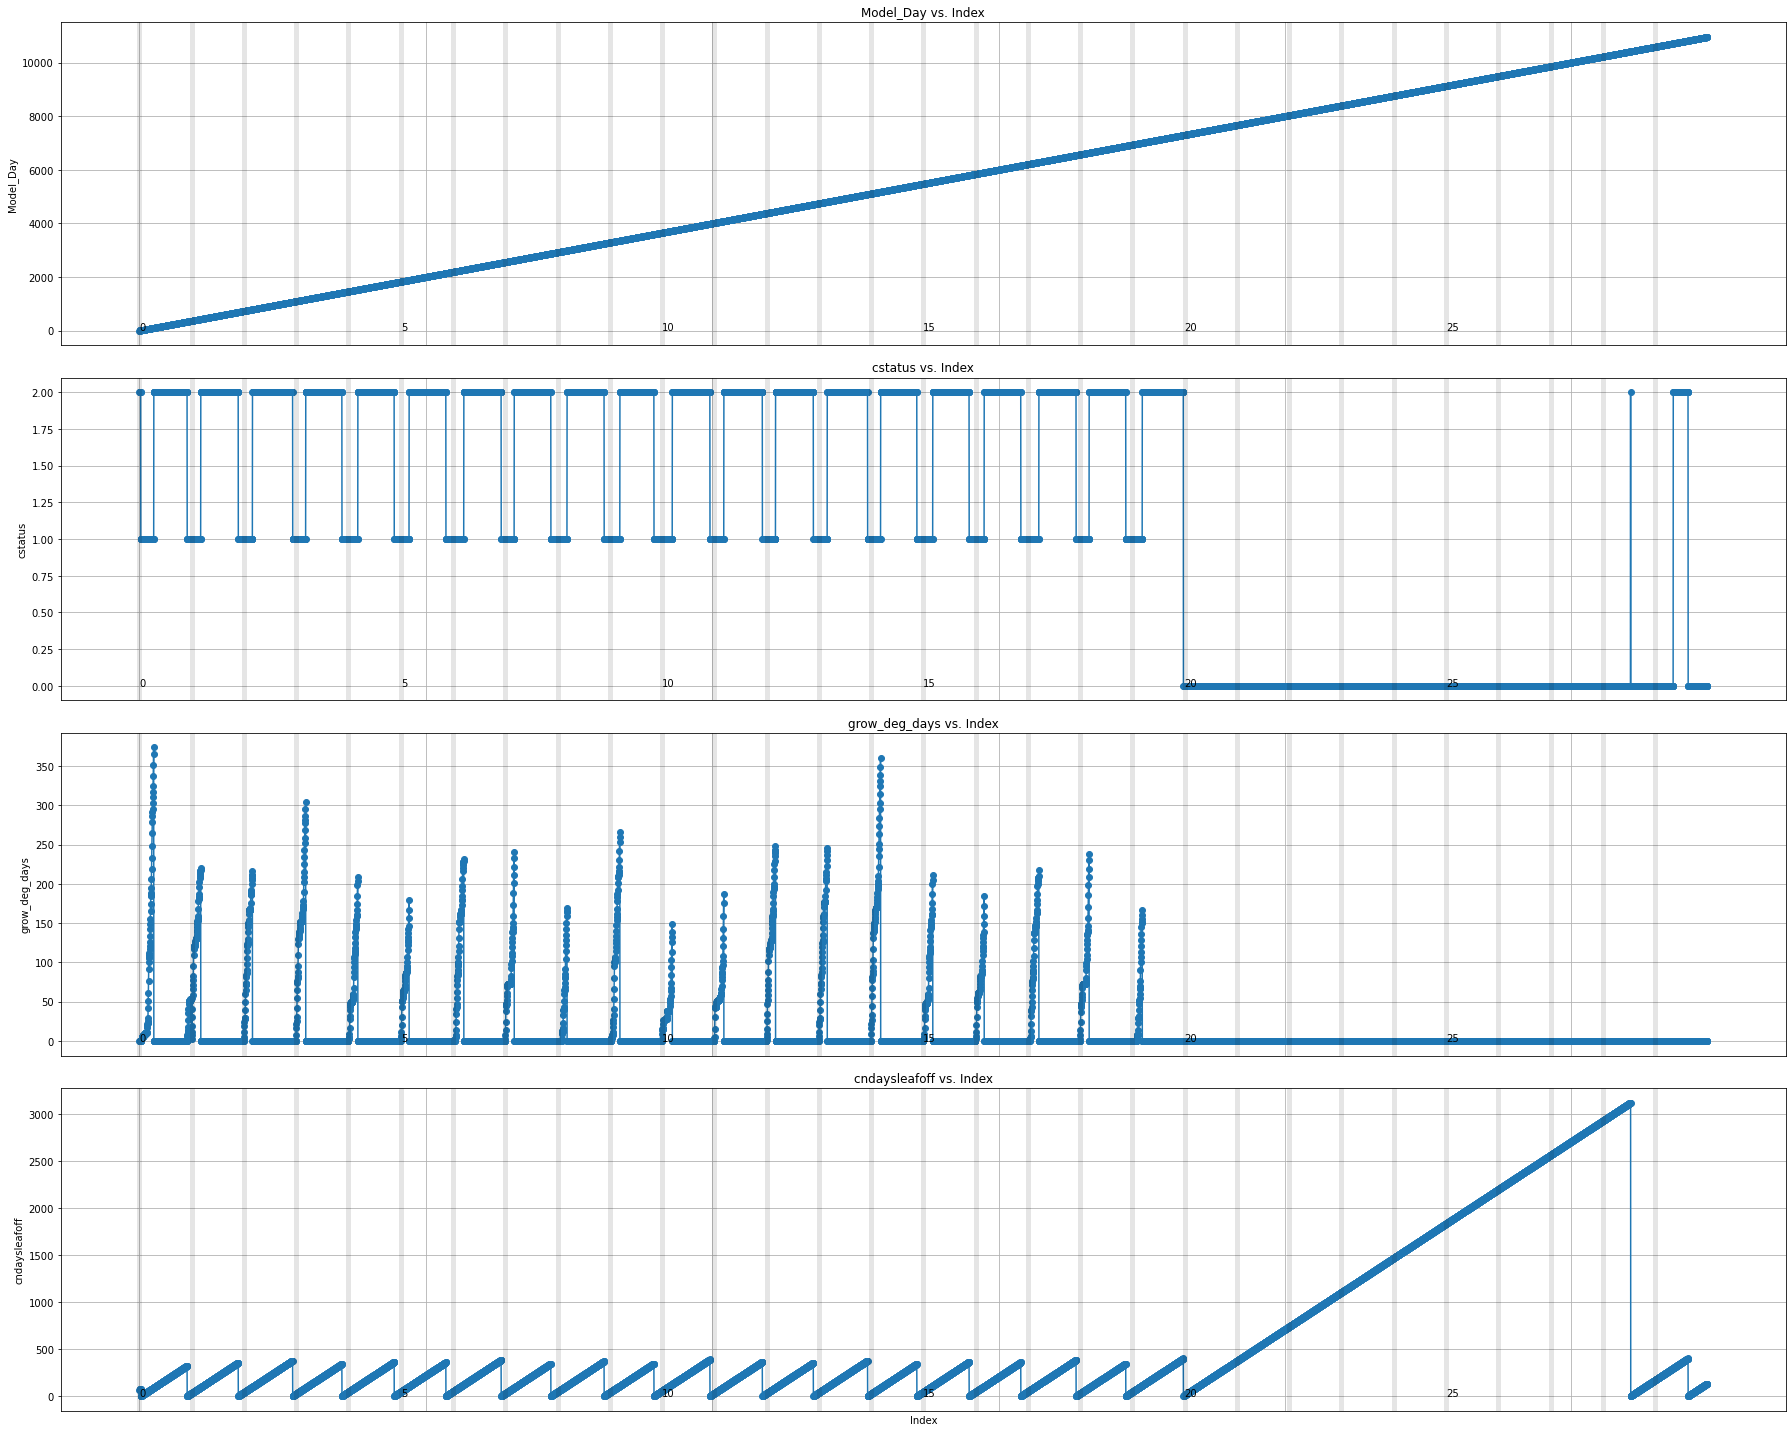

In [147]:
import matplotlib.pyplot as plt

# Assuming ict_of_dataframes is a dictionary of dataframes
# Define the number of rows and columns for subplots
df_key = "sinkhole_phenology_LOff2"
num_rows = len(dict_of_dataframes[f'{df_key}'].columns[1:]) # Number of rows for subplots
num_cols = 1  # Number of columns for subplots

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

# Iterate over dataframes and plot each one on a separate subplot
for idx, df_key_col in enumerate(dict_of_dataframes[f'{df_key}'].columns[1:]):    
    axes[idx].plot(dict_of_dataframes[f"{df_key}"].index, dict_of_dataframes[f"{df_key}"][f"{df_key_col}"], marker='o', linestyle='-', label=key)
    axes[idx].set_ylabel(f'{df_key_col}')
    axes[idx].set_title(f'{df_key_col} vs. Index')
    axes[idx].grid(True)
    #axes[row_idx].legend()
    axes[idx].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    
    for i in range(max_r_years):
        axes[idx].axvline(x = i*365, color = 'k',lw=5, alpha=.1)
        if (i%5==0) and (idx not in []):
            axes[idx].text(i*365,0, int(i))

axes[idx].set_xlabel('Index')
# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.1) 
plt.show()


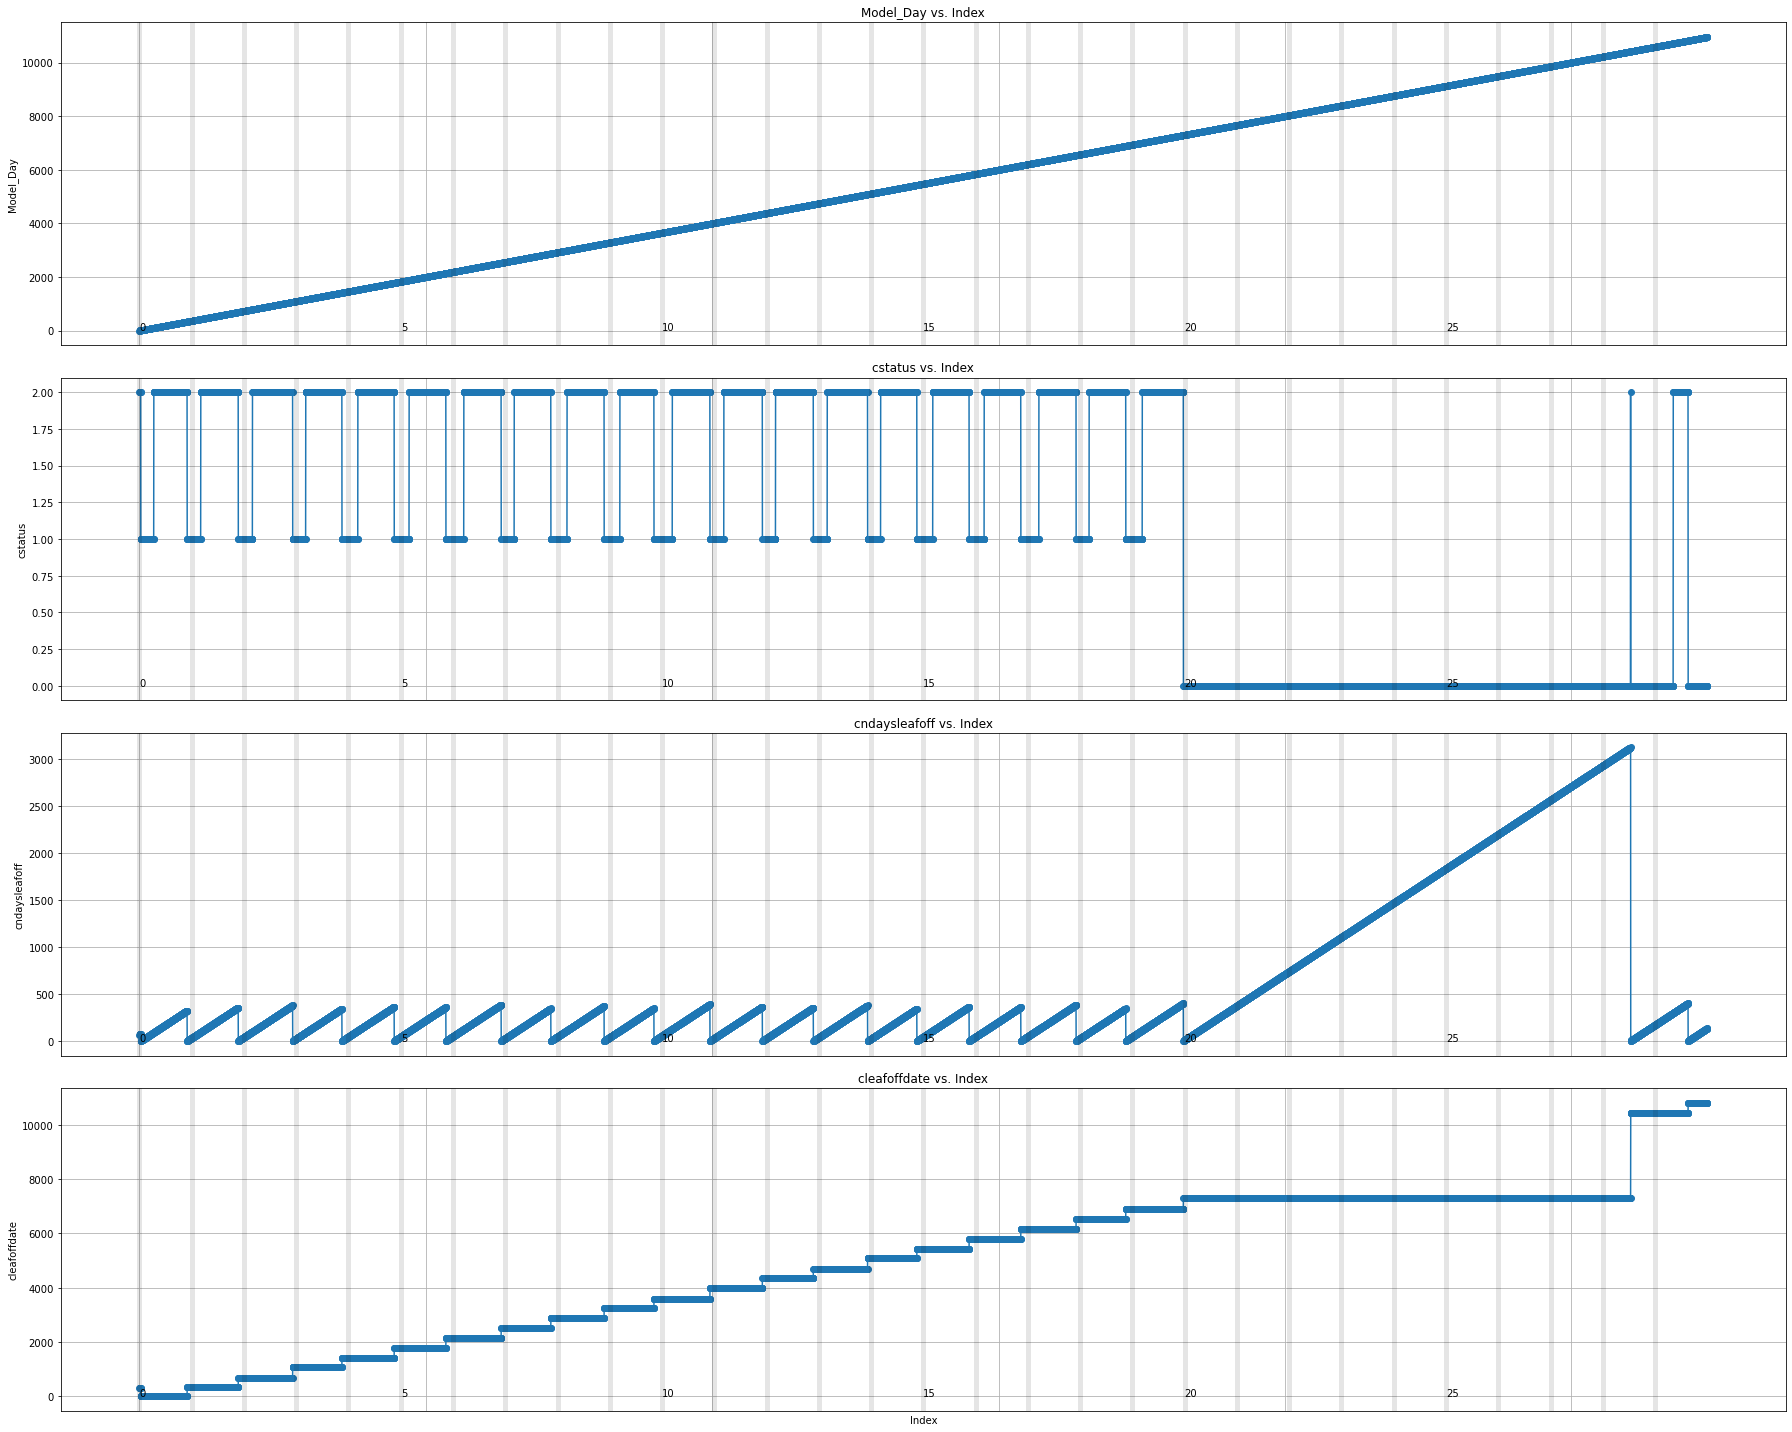

In [176]:
 import matplotlib.pyplot as plt

# Assuming ict_of_dataframes is a dictionary of dataframes
# Define the number of rows and columns for subplots
df_key = "sinkhole_phenology_LOff_th"
num_rows = len(dict_of_dataframes[f'{df_key}'].columns[1:]) # Number of rows for subplots
num_cols = 1  # Number of columns for subplots

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

# Iterate over dataframes and plot each one on a separate subplot
for idx, df_key_col in enumerate(dict_of_dataframes[f'{df_key}'].columns[1:]):    
    axes[idx].plot(dict_of_dataframes[f"{df_key}"].index, dict_of_dataframes[f"{df_key}"][f"{df_key_col}"], marker='o', linestyle='-', label=key)
    axes[idx].set_ylabel(f'{df_key_col}')
    axes[idx].set_title(f'{df_key_col} vs. Index')
    axes[idx].grid(True)
    #axes[row_idx].legend()
    axes[idx].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    
    for i in range(max_r_years):
        axes[idx].axvline(x = i*365, color = 'k',lw=5, alpha=.1)
        if (i%5==0) and (idx not in []):
            axes[idx].text(i*365,0, int(i))

axes[idx].set_xlabel('Index')
# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.1) 
plt.show()


In [184]:
# when did the status change?

dict_of_dataframes[f"{df_key}"]["cstatus"][dict_of_dataframes[f"{df_key}"]["cstatus"]==0].head()

7291    0.0
7292    0.0
7293    0.0
7294    0.0
7295    0.0
Name: cstatus, dtype: float64

2.0

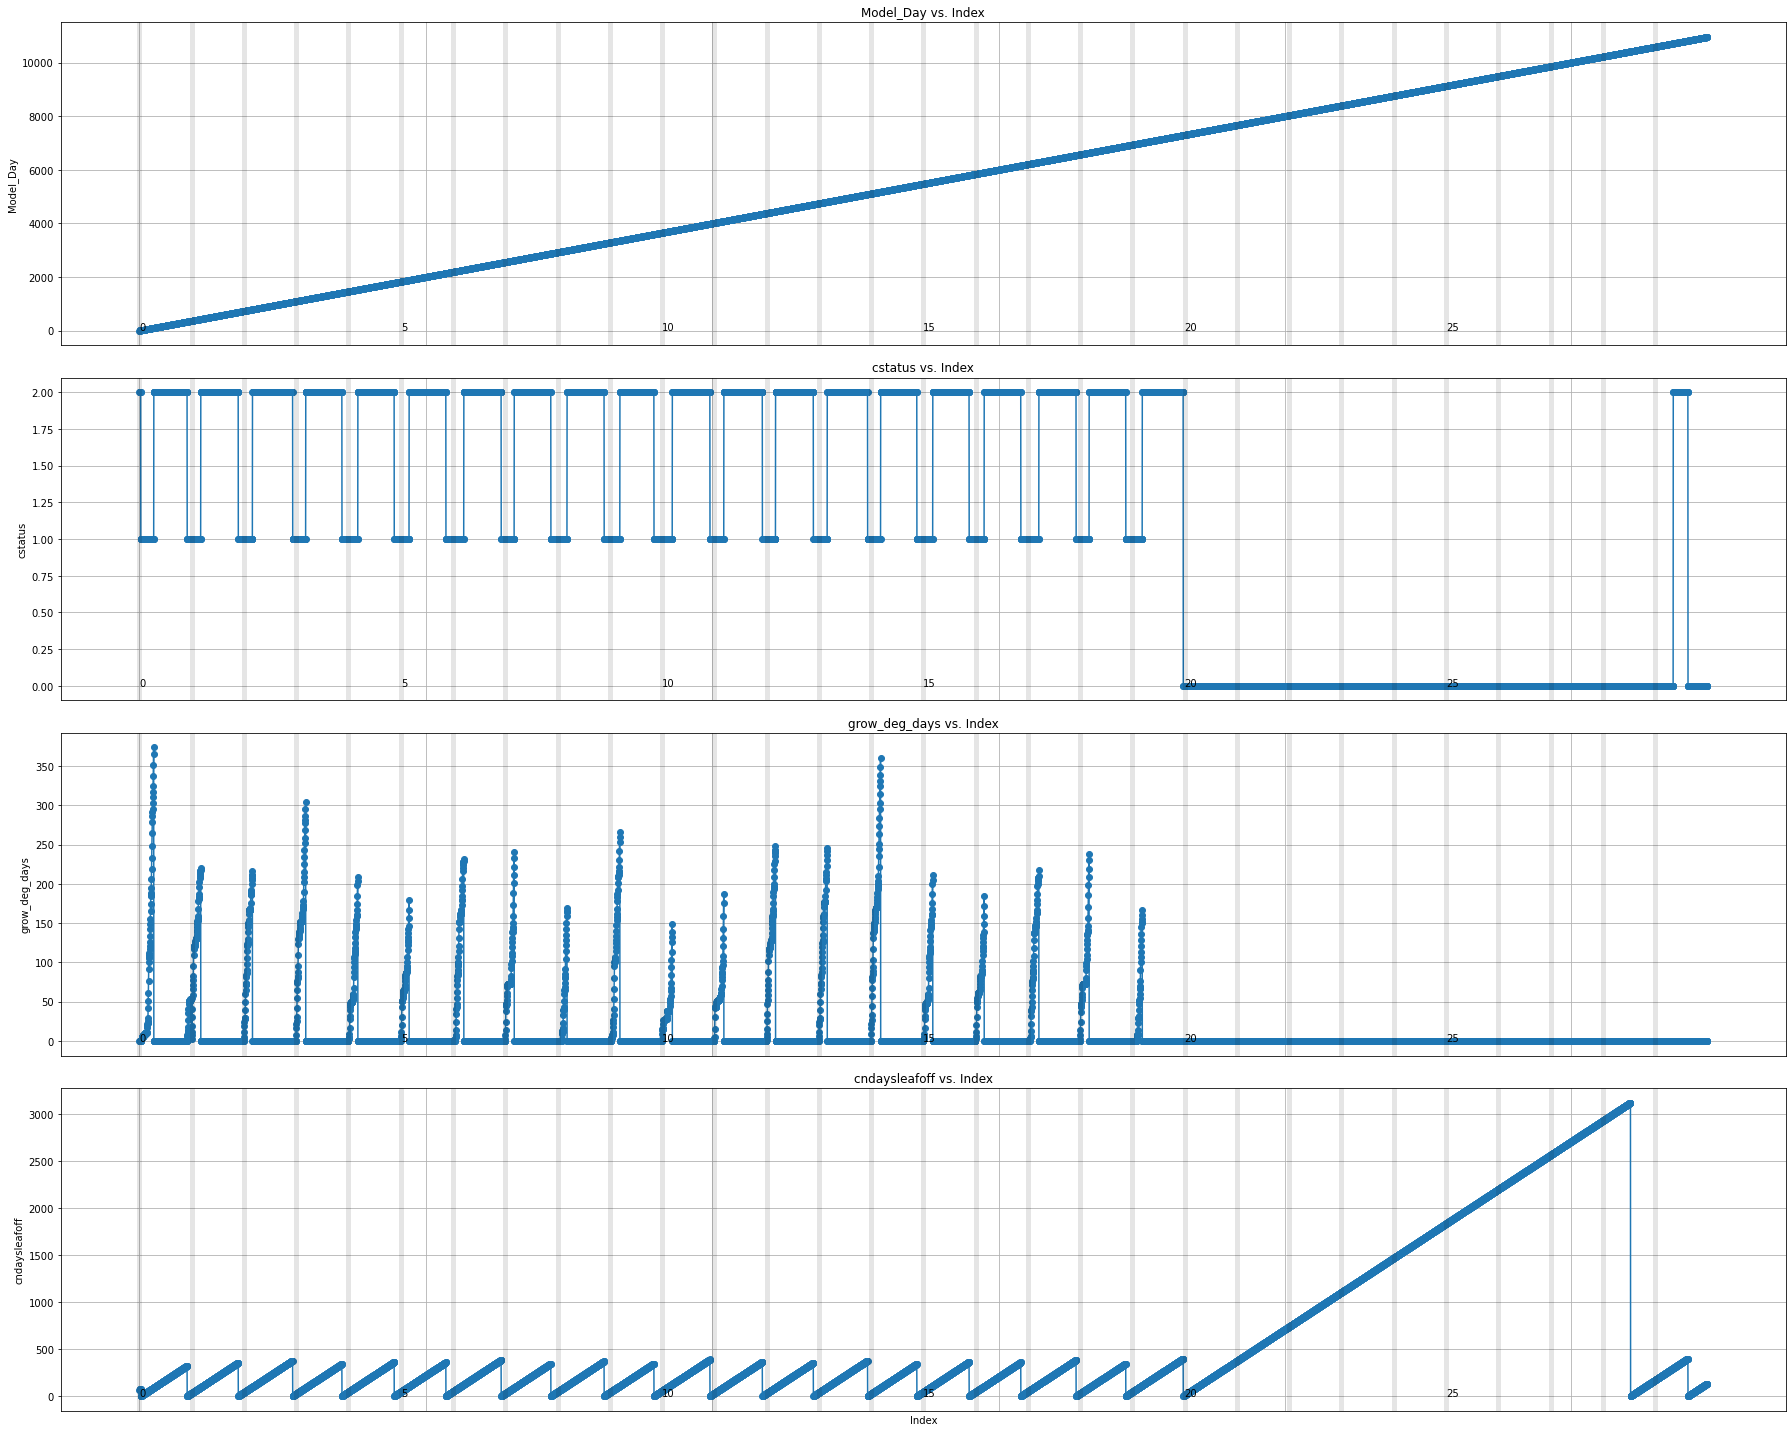

In [149]:
 import matplotlib.pyplot as plt

# Assuming ict_of_dataframes is a dictionary of dataframes
# Define the number of rows and columns for subplots
df_key = "sinkhole_phenology_LOff_th2"
num_rows = len(dict_of_dataframes[f'{df_key}'].columns[1:]) # Number of rows for subplots
num_cols = 1  # Number of columns for subplots

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

# Iterate over dataframes and plot each one on a separate subplot
for idx, df_key_col in enumerate(dict_of_dataframes[f'{df_key}'].columns[1:]):    
    axes[idx].plot(dict_of_dataframes[f"{df_key}"].index, dict_of_dataframes[f"{df_key}"][f"{df_key_col}"], marker='o', linestyle='-', label=key)
    axes[idx].set_ylabel(f'{df_key_col}')
    axes[idx].set_title(f'{df_key_col} vs. Index')
    axes[idx].grid(True)
    #axes[row_idx].legend()
    axes[idx].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    
    for i in range(max_r_years):
        axes[idx].axvline(x = i*365, color = 'k',lw=5, alpha=.1)
        if (i%5==0) and (idx not in []):
            axes[idx].text(i*365,0, int(i))

axes[idx].set_xlabel('Index')
# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.1) 
plt.show()


## Mystery

What happend a day before that led to state change?


In [232]:
index = 7290
print(f"index:{index}")
print(f"cstatus: {dict_of_dataframes[f'sinkhole_phenology_LOff_th']['cstatus'][index]}")
print ("That means the state is 'phen_cstat_notcold' state and leaves are allowed to flush")
print(f"grow_deg_days: {dict_of_dataframes[f'sinkhole_phenology_LOn1']['grow_deg_days'][index]}")
print(f"gdd_threshold: {round(dict_of_dataframes[f'sinkhole_phenology_LOn1']['gdd_threshold'][index],3)}")
print(f"cleafondate: {dict_of_dataframes[f'sinkhole_phenology_LOn1']['cleafondate'][index]}")
print(f"nchilldays: {dict_of_dataframes[f'sinkhole_phenology_LOn1']['nchilldays'][index]}")
print(f"cndaysleafon: {dict_of_dataframes[f'sinkhole_phenology_LOff1']['cndaysleafon'][index]}")
print(f"temp_in_C: {round(dict_of_dataframes[f'sinkhole_phenology']['temp_in_C'][index],3)}")
print(f"ncdstart: {round(dict_of_dataframes[f'sinkhole_phenology']['ncdstart'][index],3)}")
print (f"Nov 1 after 19 years {365*19+270}")
print(f"gddstart: {round(dict_of_dataframes[f'sinkhole_phenology']['gddstart'][index],3)}")
print (f"Jan 1 after 19 years {365*19+1}")
print (f"Jan 1 after 20 years {365*20+1}")
print(f"ncolddays: {round(dict_of_dataframes[f'sinkhole_phenology']['ncolddays'][index],3)}")
print(f"cleafoffdate: {round(dict_of_dataframes[f'sinkhole_phenology']['cleafoffdate'][index],3)}")
print(f"cndaysleafoff: {round(dict_of_dataframes[f'sinkhole_phenology']['cndaysleafoff'][index],3)}")
print(f"cleafondate: {round(dict_of_dataframes[f'sinkhole_phenology']['cleafondate'][index],3)}")
print(f"cndaysleafon: {round(dict_of_dataframes[f'sinkhole_phenology']['cndaysleafon'][index],3)}")





index:7290
cstatus: 2.0
That means the state is 'phen_cstat_notcold' state and leaves are allowed to flush
grow_deg_days: 0.0
gdd_threshold: 526.867
cleafondate: 7005.0
nchilldays: 7.0
cndaysleafon: 286.0
temp_in_C: 1.723
ncdstart: 270.0
Nov 1 after 19 years 7205
gddstart: 1.0
Jan 1 after 19 years 6936
Jan 1 after 20 years 7301
ncolddays: 3.0
cleafoffdate: 6890.0
cndaysleafoff: 401.0
cleafondate: 7005.0
cndaysleafon: 286.0


In [233]:
index = 7291
print(f"index:{index}")
print(f"cstatus: {dict_of_dataframes[f'sinkhole_phenology_LOff_th']['cstatus'][index]}")
print ("That means the state is 'phen_cstat_notcold' state and leaves are allowed to flush")
print(f"grow_deg_days: {dict_of_dataframes[f'sinkhole_phenology_LOn1']['grow_deg_days'][index]}")
print(f"gdd_threshold: {round(dict_of_dataframes[f'sinkhole_phenology_LOn1']['gdd_threshold'][index],3)}")
print(f"cleafondate: {dict_of_dataframes[f'sinkhole_phenology_LOn1']['cleafondate'][index]}")
print(f"nchilldays: {dict_of_dataframes[f'sinkhole_phenology_LOn1']['nchilldays'][index]}")
print(f"cndaysleafon: {dict_of_dataframes[f'sinkhole_phenology_LOff1']['cndaysleafon'][index]}")
print(f"temp_in_C: {round(dict_of_dataframes[f'sinkhole_phenology']['temp_in_C'][index],3)}")
print(f"ncdstart: {round(dict_of_dataframes[f'sinkhole_phenology']['ncdstart'][index],3)}")
print (f"Nov 1 after 19 years {365*19+270}")
print(f"gddstart: {round(dict_of_dataframes[f'sinkhole_phenology']['gddstart'][index],3)}")
print (f"Jan 1 after 19 years {365*19+1}")
print (f"Jan 1 after 20 years {365*20+1}")
print(f"ncolddays: {round(dict_of_dataframes[f'sinkhole_phenology']['ncolddays'][index],3)}")
print(f"cleafoffdate: {round(dict_of_dataframes[f'sinkhole_phenology']['cleafoffdate'][index],3)}")
print(f"cndaysleafoff: {round(dict_of_dataframes[f'sinkhole_phenology']['cndaysleafoff'][index],3)}")
print(f"cleafondate: {round(dict_of_dataframes[f'sinkhole_phenology']['cleafondate'][index],3)}")
print(f"cndaysleafon: {round(dict_of_dataframes[f'sinkhole_phenology']['cndaysleafon'][index],3)}")





index:7291
cstatus: 0.0
That means the state is 'phen_cstat_notcold' state and leaves are allowed to flush
grow_deg_days: 0.0
gdd_threshold: 520.948
cleafondate: 7005.0
nchilldays: 8.0
cndaysleafon: 287.0
temp_in_C: 2.641
ncdstart: 270.0
Nov 1 after 19 years 7205
gddstart: 1.0
Jan 1 after 19 years 6936
Jan 1 after 20 years 7301
ncolddays: 4.0
cleafoffdate: 7291.0
cndaysleafoff: 1.0
cleafondate: 7005.0
cndaysleafon: 287.0


In [204]:
dict_of_dataframes[f'sinkhole_phenology_LOff1'].columns

Index(['Name', 'Model_Day', 'cstatus', 'num_vegtemp_mem',
       'ED_val_phen_ncolddayslim', 'ED_val_phen_mindayson', 'cndaysleafon'],
      dtype='object')

In [208]:
dict_of_dataframes['sinkhole_phenology'].columns

Index(['Name', 'Model_Day', 'temp_in_C', 'ncdstart', 'gddstart', 'nchilldays',
       'gdd_threshold', 'ncolddays', 'grow_deg_days', 'cleafoffdate',
       'cndaysleafoff', 'cleafondate', 'cndaysleafon'],
      dtype='object')